### **1. Problem Definition & Business Understanding**

**Tujuan Business:**
- Memprediksi kualitas buah anggur (quality_score) untuk meningkatkan standar produksi
- Mengidentifikasi faktor-faktor yang paling berpengaruh terhadap kualitas anggur

**Pertanyaan Analitis:**
- Fitur fisik/kimia apa saja yang paling memengaruhi kualitas anggur?
- Bagaimana hubungan antar variabel lingkungan dengan kualitas?

**Metrik Sukses:**
- R² Score ≥ 0.90 (model dapat menjelaskan 90% variasi kualitas)
- RMSE seminimal mungkin (error prediksi sekecil mungkin)

### **2. Data Understanding**

**Dataset grape_quality.csv** berisi data hasil panen anggur dari berbagai varietas dan region, digunakan untuk menganalisis faktor-faktor yang memengaruhi quality_score.

**Dataset ini memiliki 1.000 baris dan 12 kolom data yang mempresentasikan:**
| **Kolom**             	| **Deskripsi**                                             	|
|-----------------------	|-----------------------------------------------------------	|
| sample_id             	| ID unik untuk setiap sampel anggur                        	|
| variety               	| Varietas anggur (misal: Merlot, Cabernet Sauvignon, dsb.) 	|
| region                	| Daerah/wilayah asal sampel                                	|
| quality_score         	| Skor kualitas anggur (skala 0–100)                        	|
| sugar_content_brix    	| Kandungan gula dalam sampel (°Brix)                       	|
| acidity_ph            	| Tingkat keasaman (pH)                                     	|
| cluster_weight_g      	| Berat rata-rata satu ronce (gram)                         	|
| berry_size_mm         	| Diameter rata-rata buah berry (mm)                        	|
| harvest_date          	| Tanggal panen (format YYYY-MM-DD)                         	|
| sun_exposure_hours    	| Total jam paparan sinar matahari selama musim pertumbuhan 	|
| soil_moisture_percent 	| Kelembaban tanah rata-rata di area perkebunan (%)         	|
| rainfall_mm           	| Total curah hujan (mm) selama periode pertumbuhan         	|

**Kondisi Data:**
- Missing Values (Berdasarkan Exploratory Data Analytics yang telah dilakukan, ditemukan bahwa terdapat missing values pada dataset di kolom berikut).
    - acidity_ph : 5 baris kosong
    - soil_moisture_percent : 5 baris kosong

- Duplicated Data (Berdasarkan Exploratory Data Analytics yang telah dilakukan, tidak ditemukan terdapat baris duplikat dalam dataset).
- Outlier (Berdasarkan pengecekan menggunakan metode IQR (1.5 × IQR), tidak terdeteksi nilai ekstrem yang signifikan pada kolom-kolom numerik).

### **3. Exploratory Data Analytics**

**3.1. Import Libraries dan Setup**

In [237]:
# === IMPORT LIBRARIES ===
# Library untuk manipulasi data
import pandas as pd  # Untuk membaca dan memanipulasi data dalam format tabel
import numpy as np   # Untuk operasi matematika dan array

# Library untuk visualisasi data
import seaborn as sns      # Untuk membuat grafik statistik yang menarik
import matplotlib.pyplot as plt  # Untuk membuat berbagai jenis grafik

# Library untuk machine learning
from sklearn.impute import SimpleImputer           # Untuk mengisi missing values
from sklearn.preprocessing import LabelEncoder     # Untuk mengubah kategori menjadi angka
from sklearn.model_selection import train_test_split, GridSearchCV  # Untuk split data dan tuning
from sklearn.ensemble import GradientBoostingRegressor  # Model machine learning
from sklearn.metrics import r2_score, mean_squared_error  # Untuk evaluasi model

# Library tambahan untuk analisis statistik
import time  # Untuk mengukur waktu eksekusi
from scipy import stats  # Untuk uji statistik

# Konfigurasi tampilan
plt.style.use('default')  # Set style default untuk plot
sns.set_palette("husl")   # Set warna yang menarik untuk seaborn
pd.set_option('display.max_columns', None)  # Tampilkan semua kolom

print("✅ Semua libraries berhasil diimport!")
print("📊 Siap untuk analisis data kualitas anggur")

✅ Semua libraries berhasil diimport!
📊 Siap untuk analisis data kualitas anggur


**3.2. Load dan Preview Dataset**

In [238]:
import pandas as pd

# === LOAD DATASET ===
try:
    # Baca file CSV dari folder datas
    df = pd.read_csv('../datas/grape_quality.csv')
    print(f"✅ Dataset berhasil dimuat!")
    print(f"📈 Ukuran dataset: {df.shape[0]} baris dan {df.shape[1]} kolom")
    
    # Tampilkan 5 baris pertama untuk preview
    print("\n🔍 Preview 5 baris pertama:")
    display(df.head())
    
except FileNotFoundError:
    print("❌ Error: File grape_quality.csv tidak ditemukan!")
    print("💡 Pastikan file ada di folder ../datas/")
except Exception as e:
    print(f"❌ Error saat membaca dataset: {e}")

✅ Dataset berhasil dimuat!
📈 Ukuran dataset: 1000 baris dan 12 kolom

🔍 Preview 5 baris pertama:


,sample_id,variety,region,quality_score,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,harvest_date,sun_exposure_hours,soil_moisture_percent,rainfall_mm
0,1,Riesling,Barossa Valley,2.11,13.70,3.17,251.81,18.58,9/4/2023,8.4,55.9,223.3
1,2,Pinot Noir,Loire Valley,2.83,20.84,3.15,289.00,22.08,9/16/2023,8.8,36.9,312.1
2,3,Sauvignon Blanc,Napa Valley,3.52,27.46,4.07,125.14,21.40,8/25/2023,11.1,64.9,698.7
3,4,Riesling,Napa Valley,2.28,24.64,3.15,237.46,12.31,9/13/2023,8.0,54.5,660.1
4,5,Merlot,Napa Valley,2.90,26.13,3.18,221.52,12.24,8/11/2023,11.2,36.3,410.4


**3.3. Dataset Summary**

In [239]:
# === INFORMASI DASAR DATASET ===

# Tampilkan ukuran dataset (baris x kolom)
print("📈 UKURAN DATASET:")
print(f"Jumlah baris (sampel): {df.shape[0]:,}")
print(f"Jumlah kolom (fitur): {df.shape[1]:,}")
print(f"Total data points: {df.shape[0] * df.shape[1]:,}")

# Tampilkan informasi detail tentang tipe data dan memory usage
print("\n📊 INFO DATASET:")
df.info(memory_usage='deep')

📈 UKURAN DATASET:
Jumlah baris (sampel): 1,000
Jumlah kolom (fitur): 12
Total data points: 12,000

📊 INFO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sample_id              1000 non-null   int64  
 1   variety                1000 non-null   object 
 2   region                 1000 non-null   object 
 3   quality_score          1000 non-null   float64
 4   sugar_content_brix     1000 non-null   float64
 5   acidity_ph             995 non-null    float64
 6   cluster_weight_g       1000 non-null   float64
 7   berry_size_mm          1000 non-null   float64
 8   harvest_date           1000 non-null   object 
 9   sun_exposure_hours     1000 non-null   float64
 10  soil_moisture_percent  995 non-null    float64
 11  rainfall_mm            1000 non-null   float64
dtypes: float64(8), int64(1), object(3)
memory usag

**3.4. Descriptive Statistics**

In [240]:
# === STATISTIK DESKRIPTIF ===

# Tampilkan statistik untuk semua kolom numerik
print("📉 STATISTIK DESKRIPTIF KOLOM NUMERIK:")
descriptive_stats = df.describe()
display(descriptive_stats)

# Hitung dan tampilkan informasi tambahan untuk target variable
print(f"\n🎯 ANALISIS TARGET VARIABLE (quality_score):")
print(f"Mean (rata-rata): {df['quality_score'].mean():.3f}")
print(f"Median (nilai tengah): {df['quality_score'].median():.3f}")
print(f"Standard Deviation: {df['quality_score'].std():.3f}")
print(f"Range (rentang): {df['quality_score'].min():.1f} - {df['quality_score'].max():.1f}")
print(f"Skewness (kemencengan): {df['quality_score'].skew():.3f}")

📉 STATISTIK DESKRIPTIF KOLOM NUMERIK:


,sample_id,quality_score,sugar_content_brix,acidity_ph,cluster_weight_g,berry_size_mm,sun_exposure_hours,soil_moisture_percent,rainfall_mm
count,1000.000000,1000.00000,1000.000000,995.000000,1000.000000,1000.000000,1000.000000,995.000000,1000.00000
mean,500.500000,2.49436,20.140150,3.504111,197.112470,17.411620,8.992600,49.750653,489.42300
std,288.819436,0.52896,5.843944,0.407103,85.946831,4.302279,1.736462,11.602668,170.95025
min,1.000000,1.10000,10.060000,2.800000,50.200000,10.000000,6.000000,30.100000,200.10000
25%,250.750000,2.10000,14.817500,3.165000,122.572500,13.677500,7.500000,39.600000,341.60000
50%,500.500000,2.50000,20.375000,3.500000,195.285000,17.415000,8.900000,49.400000,490.40000
75%,750.250000,2.87000,25.212500,3.860000,271.265000,21.097500,10.400000,60.300000,628.65000
max,1000.000000,3.97000,29.990000,4.200000,349.870000,24.970000,12.000000,70.000000,799.30000



🎯 ANALISIS TARGET VARIABLE (quality_score):
Mean (rata-rata): 2.494
Median (nilai tengah): 2.500
Standard Deviation: 0.529
Range (rentang): 1.1 - 4.0
Skewness (kemencengan): 0.009


**3.5. Check Missing Values**

In [241]:
# === ANALISIS MISSING VALUES ===

# Hitung missing values per kolom
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Buat DataFrame untuk analisis missing values
missing_df = pd.DataFrame({
    'Kolom': missing_data.index,
    'Jumlah_Missing': missing_data.values,
    'Persentase': missing_percent.values
}).sort_values('Jumlah_Missing', ascending=False)

print("⚠️ MISSING VALUES PER KOLOM:")
print(missing_df[missing_df['Jumlah_Missing'] > 0])

# Tampilkan ringkasan
total_missing = missing_data.sum()
print(f"\n📊 RINGKASAN MISSING VALUES:")
print(f"Total missing values: {total_missing}")
print(f"Kolom dengan missing values: {(missing_data > 0).sum()}")
print(f"Persentase data lengkap: {((len(df) * len(df.columns) - total_missing) / (len(df) * len(df.columns)) * 100):.2f}%")

⚠️ MISSING VALUES PER KOLOM:
                    Kolom  Jumlah_Missing  Persentase
10  soil_moisture_percent               5         0.5
5              acidity_ph               5         0.5

📊 RINGKASAN MISSING VALUES:
Total missing values: 10
Kolom dengan missing values: 2
Persentase data lengkap: 99.92%


**3.6. Check Data Duplication**

In [242]:
# === ANALISIS DATA DUPLIKAT ===

# Hitung jumlah baris yang duplikat
duplicate_rows = df.duplicated().sum()
total_rows = len(df)
duplication_percentage = (duplicate_rows / total_rows) * 100

print(f"🔀 ANALISIS DUPLIKASI DATA:")
print(f"Total baris: {total_rows:,}")
print(f"Baris duplikat: {duplicate_rows}")
print(f"Persentase duplikasi: {duplication_percentage:.2f}%")
print(f"Baris unik: {total_rows - duplicate_rows:,}")

# Cek duplikasi berdasarkan kolom tertentu (tanpa sample_id)
if 'sample_id' in df.columns:
    duplicate_without_id = df.drop('sample_id', axis=1).duplicated().sum()
    print(f"\n🆔 Duplikasi tanpa sample_id: {duplicate_without_id}")

if duplicate_rows == 0:
    print("\n✅ Dataset tidak memiliki baris duplikat - Data berkualitas baik!")
else:
    print(f"\n⚠️ Ditemukan {duplicate_rows} baris duplikat yang perlu ditangani.")

🔀 ANALISIS DUPLIKASI DATA:
Total baris: 1,000
Baris duplikat: 0
Persentase duplikasi: 0.00%
Baris unik: 1,000

🆔 Duplikasi tanpa sample_id: 0

✅ Dataset tidak memiliki baris duplikat - Data berkualitas baik!


**3.7. Outlier Analysis**

In [243]:
# === ANALISIS OUTLIER DENGAN METODE IQR ===

def detect_outliers_iqr(column_name):
    # Hitung Q1 (kuartil pertama - 25%)
    Q1 = df[column_name].quantile(0.25)
    # Hitung Q3 (kuartil ketiga - 75%)
    Q3 = df[column_name].quantile(0.75)
    # Hitung IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Tentukan batas bawah dan atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifikasi outlier (data di luar batas)
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    outlier_count = len(outliers)
    
    print(f"{column_name:25} : {outlier_count:3d} outlier(s) | Range normal: [{lower_bound:.2f}, {upper_bound:.2f}]")
    return outlier_count

# Analisis outlier untuk semua kolom numerik
print("🔍 DETEKSI OUTLIER MENGGUNAKAN METODE IQR:")
print("Kolom".ljust(25) + " : Jumlah Outlier | Range Normal")
print("-" * 70)

numeric_columns = df.select_dtypes(include=[np.number]).columns
total_outliers = 0

for column in numeric_columns:
    outlier_count = detect_outliers_iqr(column)
    total_outliers += outlier_count

print(f"\n📊 RINGKASAN OUTLIER:")
print(f"Total outlier ditemukan: {total_outliers}")

if total_outliers == 0:
    print("\n✅ Tidak ada outlier signifikan terdeteksi - Data dalam kondisi baik!")

🔍 DETEKSI OUTLIER MENGGUNAKAN METODE IQR:
Kolom                     : Jumlah Outlier | Range Normal
----------------------------------------------------------------------
sample_id                 :   0 outlier(s) | Range normal: [-498.50, 1499.50]
quality_score             :   0 outlier(s) | Range normal: [0.95, 4.03]
sugar_content_brix        :   0 outlier(s) | Range normal: [-0.77, 40.80]
acidity_ph                :   0 outlier(s) | Range normal: [2.12, 4.90]
cluster_weight_g          :   0 outlier(s) | Range normal: [-100.47, 494.30]
berry_size_mm             :   0 outlier(s) | Range normal: [2.55, 32.23]
sun_exposure_hours        :   0 outlier(s) | Range normal: [3.15, 14.75]
soil_moisture_percent     :   0 outlier(s) | Range normal: [8.55, 91.35]
rainfall_mm               :   0 outlier(s) | Range normal: [-88.97, 1059.22]

📊 RINGKASAN OUTLIER:
Total outlier ditemukan: 0

✅ Tidak ada outlier signifikan terdeteksi - Data dalam kondisi baik!


**3.8. Data Types and Unique Value Categorical**

In [244]:
# === ANALISIS KOLOM KATEGORIKAL ===

# Identifikasi kolom kategorikal (bertipe object)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print(f"🏷️ ANALISIS KOLOM KATEGORIKAL:")
print(f"Jumlah kolom kategorikal: {len(categorical_columns)}")
print("-" * 60)

# Analisis detail setiap kolom kategorikal
for i, col in enumerate(categorical_columns, 1):
    unique_count = df[col].nunique()
    total_count = len(df[col])
    most_common = df[col].mode()[0] if not df[col].empty else 'N/A'
    most_common_count = df[col].value_counts().iloc[0] if not df[col].empty else 0
    
    print(f"{i}. {col}:")
    print(f"   - Tipe data: {df[col].dtype}")
    print(f"   - Jumlah kategori unik: {unique_count}")
    print(f"   - Nilai paling sering: '{most_common}' ({most_common_count} kali)")
    print(f"   - Contoh nilai: {list(df[col].dropna().unique()[:3])}")
    print()

# Tampilkan distribusi untuk kolom kategorikal
print("📊 DISTRIBUSI NILAI KATEGORIKAL:")
for col in categorical_columns:
    print(f"\n{col.upper()}:")
    value_counts = df[col].value_counts()
    for value, count in value_counts.head().items():
        percentage = (count / len(df)) * 100
        print(f"  {value}: {count} ({percentage:.1f}%)")

🏷️ ANALISIS KOLOM KATEGORIKAL:
Jumlah kolom kategorikal: 3
------------------------------------------------------------
1. variety:
   - Tipe data: object
   - Jumlah kategori unik: 8
   - Nilai paling sering: 'Pinot Noir' (146 kali)
   - Contoh nilai: ['Riesling', 'Pinot Noir', 'Sauvignon Blanc']

2. region:
   - Tipe data: object
   - Jumlah kategori unik: 8
   - Nilai paling sering: 'Napa Valley' (137 kali)
   - Contoh nilai: ['Barossa Valley', 'Loire Valley', 'Napa Valley']

3. harvest_date:
   - Tipe data: object
   - Jumlah kategori unik: 61
   - Nilai paling sering: '8/20/2023' (29 kali)
   - Contoh nilai: ['9/4/2023', '9/16/2023', '8/25/2023']

📊 DISTRIBUSI NILAI KATEGORIKAL:

VARIETY:
  Pinot Noir: 146 (14.6%)
  Zinfandel: 134 (13.4%)
  Cabernet Sauvignon: 133 (13.3%)
  Sauvignon Blanc: 125 (12.5%)
  Riesling: 119 (11.9%)

REGION:
  Napa Valley: 137 (13.7%)
  Barossa Valley: 136 (13.6%)
  Bordeaux: 133 (13.3%)
  Mendoza: 130 (13.0%)
  Sonoma: 127 (12.7%)

HARVEST_DATE:
  8/20/

**3.9. Harvest Date Analysis**

In [245]:
# === ANALISIS TANGGAL PANEN ===

# Konversi kolom harvest_date ke format datetime
df['harvest_date'] = pd.to_datetime(df['harvest_date'], errors='coerce')

# Analisis rentang tanggal
min_date = df['harvest_date'].min()
max_date = df['harvest_date'].max()
date_range = max_date - min_date

print(f"📅 ANALISIS PERIODE PANEN:")
print(f"Tanggal panen pertama: {min_date.strftime('%d %B %Y')}")
print(f"Tanggal panen terakhir: {max_date.strftime('%d %B %Y')}")
print(f"Rentang waktu panen: {date_range.days} hari ({date_range.days/365.25:.1f} tahun)")

# Analisis pola panen berdasarkan bulan dan tahun
print(f"\n📆 POLA PANEN:")
df['temp_year'] = df['harvest_date'].dt.year
df['temp_month'] = df['harvest_date'].dt.month

# Distribusi per tahun
year_distribution = df['temp_year'].value_counts().sort_index()
print(f"Distribusi per tahun:")
for year, count in year_distribution.items():
    print(f"  {year}: {count} panen")

# Distribusi per bulan
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 
               'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des']
month_distribution = df['temp_month'].value_counts().sort_index()
print(f"\nDistribusi per bulan:")
for month, count in month_distribution.items():
    print(f"  {month_names[month-1]}: {count} panen")

# Hapus kolom temporary
df.drop(['temp_year', 'temp_month'], axis=1, inplace=True)

📅 ANALISIS PERIODE PANEN:
Tanggal panen pertama: 01 August 2023
Tanggal panen terakhir: 30 September 2023
Rentang waktu panen: 60 hari (0.2 tahun)

📆 POLA PANEN:
Distribusi per tahun:
  2023: 1000 panen

Distribusi per bulan:
  Ags: 497 panen
  Sep: 503 panen


**3.10. Visualisasi dan Analisis Mendalam**

**Target Variable Distribution (Quality Score)**

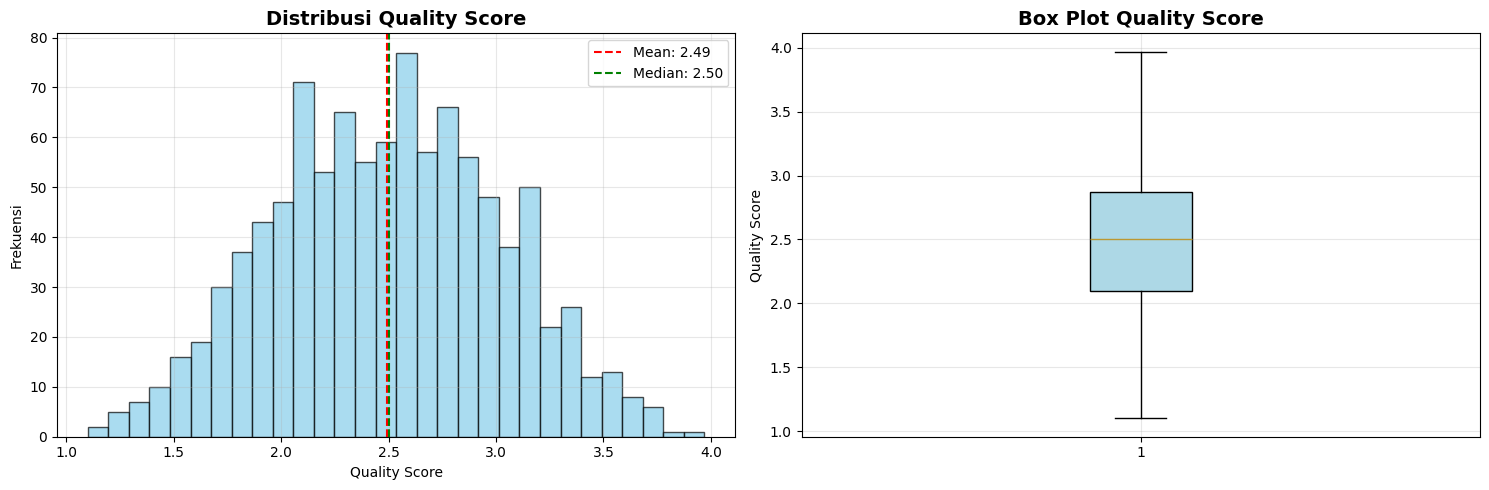


🔍 ANALISIS DISTRIBUSI QUALITY SCORE
Mean (rata-rata)     : 2.494
Median (nilai tengah): 2.500
Modus (paling sering): 2.620
Standard Deviation   : 0.529
Variance (varians)   : 0.280
Range (rentang)      : 1.10 - 3.97
Skewness (kemencengan): 0.009
Kurtosis (keruncingan): -0.508

📊 INTERPRETASI:
Distribusi data: hampir simetris
Kualitas anggur berkisar dari 1.1 hingga 4.0
Sebagian besar anggur memiliki kualitas sekitar 2.5


In [246]:
# === VISUALISASI DISTRIBUSI TARGET VARIABLE (QUALITY SCORE) ===

# Buat subplot dengan 1 baris 2 kolom untuk histogram dan boxplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. HISTOGRAM - untuk melihat distribusi frekuensi
axes[0].hist(df['quality_score'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('Distribusi Quality Score', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Quality Score')  # Label sumbu X
axes[0].set_ylabel('Frekuensi')      # Label sumbu Y
axes[0].grid(True, alpha=0.3)        # Tambahkan grid untuk kemudahan baca

# Tambahkan garis vertikal untuk mean dan median
mean_val = df['quality_score'].mean()
median_val = df['quality_score'].median()
axes[0].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
axes[0].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
axes[0].legend()

# 2. BOX PLOT - untuk melihat outlier dan kuartil
box_plot = axes[1].boxplot(df['quality_score'], vert=True, patch_artist=True)
box_plot['boxes'][0].set_facecolor('lightblue')  # Warna box
axes[1].set_title('Box Plot Quality Score', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Quality Score')  # Label sumbu Y
axes[1].grid(True, alpha=0.3)        # Tambahkan grid

# Sesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

# ANALISIS STATISTIK DETAIL
print("\n" + "="*50)
print("🔍 ANALISIS DISTRIBUSI QUALITY SCORE")
print("="*50)
print(f"Mean (rata-rata)     : {df['quality_score'].mean():.3f}")
print(f"Median (nilai tengah): {df['quality_score'].median():.3f}")
print(f"Modus (paling sering): {df['quality_score'].mode()[0]:.3f}")
print(f"Standard Deviation   : {df['quality_score'].std():.3f}")
print(f"Variance (varians)   : {df['quality_score'].var():.3f}")
print(f"Range (rentang)      : {df['quality_score'].min():.2f} - {df['quality_score'].max():.2f}")
print(f"Skewness (kemencengan): {df['quality_score'].skew():.3f}")
print(f"Kurtosis (keruncingan): {df['quality_score'].kurtosis():.3f}")

# Interpretasi skewness
skew_val = df['quality_score'].skew()
if abs(skew_val) < 0.5:
    skew_interpretation = "hampir simetris"
elif skew_val > 0:
    skew_interpretation = "menceng ke kanan (positif)"
else:
    skew_interpretation = "menceng ke kiri (negatif)"
    
print(f"\n📊 INTERPRETASI:")
print(f"Distribusi data: {skew_interpretation}")
print(f"Kualitas anggur berkisar dari {df['quality_score'].min():.1f} hingga {df['quality_score'].max():.1f}")
print(f"Sebagian besar anggur memiliki kualitas sekitar {df['quality_score'].mean():.1f}")

**Correlation Matrix - Hubungan Antar Variabel Numerik**

🔢 Menganalisis korelasi untuk 9 variabel numerik


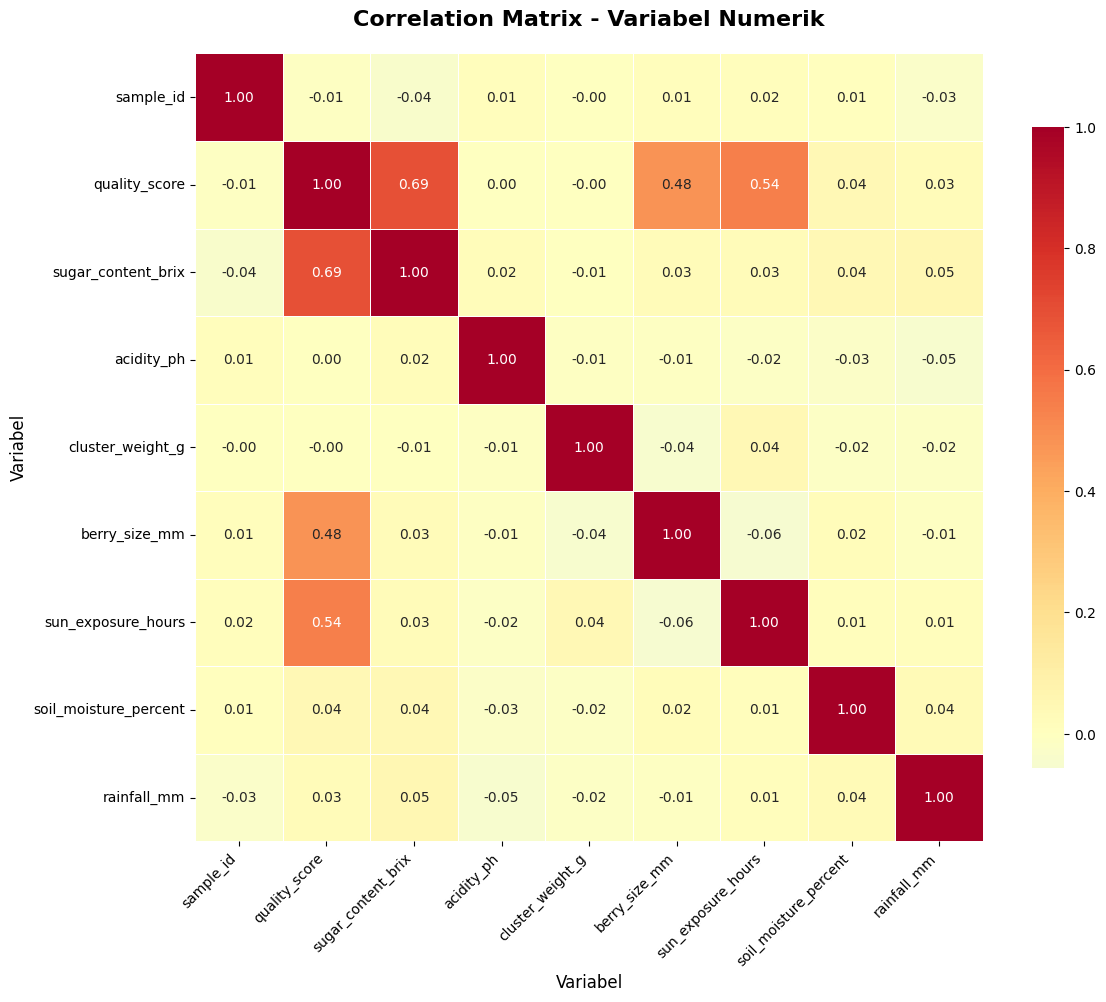


🎯 KORELASI DENGAN QUALITY_SCORE (Target Variable)
 1. sugar_content_brix        :  0.690 🔴 Kuat ⬆️ Positif
 2. sun_exposure_hours        :  0.543 🔴 Kuat ⬆️ Positif
 3. berry_size_mm             :  0.478 🟡 Sedang ⬆️ Positif
 4. soil_moisture_percent     :  0.044 🟢 Lemah ⬆️ Positif
 5. rainfall_mm               :  0.028 🟢 Lemah ⬆️ Positif
 6. sample_id                 : -0.015 🟢 Lemah ⬇️ Negatif
 7. cluster_weight_g          : -0.005 🟢 Lemah ⬇️ Negatif
 8. acidity_ph                :  0.000 🟢 Lemah ⬆️ Positif

📊 RINGKASAN:
Variabel dengan korelasi positif kuat (>0.5): 2
Variabel dengan korelasi negatif kuat (<-0.5): 0
Variabel dengan korelasi terkuat: sugar_content_brix (0.690)


In [247]:
# === ANALISIS KORELASI ANTAR VARIABEL NUMERIK ===

# Pilih hanya kolom numerik untuk analisis korelasi
numeric_df = df.select_dtypes(include=[np.number])
print(f"🔢 Menganalisis korelasi untuk {len(numeric_df.columns)} variabel numerik")

# Hitung correlation matrix
correlation_matrix = numeric_df.corr()

# Buat heatmap korelasi dengan ukuran yang sesuai
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True,           # Tampilkan nilai korelasi di setiap cell
    cmap='RdYlBu_r',     # Skema warna: merah (negatif) - kuning (netral) - biru (positif)
    center=0,            # Pusatkan warna di nilai 0
    square=True,         # Buat cell berbentuk persegi
    fmt='.2f',           # Format angka 2 desimal
    cbar_kws={'shrink': 0.8},  # Sesuaikan ukuran color bar
    linewidths=0.5       # Garis pembatas antar cell
)

# Tambahkan judul dan label
plt.title('Correlation Matrix - Variabel Numerik', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Variabel', fontsize=12)
plt.ylabel('Variabel', fontsize=12)

# Rotasi label untuk keterbacaan
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Sesuaikan layout dan tampilkan
plt.tight_layout()
plt.show()

# ANALISIS KORELASI DENGAN TARGET (QUALITY_SCORE)
print("\n" + "="*60)
print("🎯 KORELASI DENGAN QUALITY_SCORE (Target Variable)")
print("="*60)

# Ambil korelasi dengan quality_score, hapus quality_score sendiri, urutkan berdasarkan nilai absolut
quality_correlations = correlation_matrix['quality_score'].drop('quality_score').sort_values(key=abs, ascending=False)

# Tampilkan korelasi dengan interpretasi
for i, (variable, correlation) in enumerate(quality_correlations.items(), 1):
    # Tentukan kekuatan korelasi
    abs_corr = abs(correlation)
    if abs_corr > 0.7:
        strength = "Sangat Kuat"
        emoji = "🔥"
    elif abs_corr > 0.5:
        strength = "Kuat"
        emoji = "🔴"
    elif abs_corr > 0.3:
        strength = "Sedang"
        emoji = "🟡"
    else:
        strength = "Lemah"
        emoji = "🟢"
    
    # Tentukan arah korelasi
    direction = "Positif" if correlation > 0 else "Negatif"
    direction_emoji = "⬆️" if correlation > 0 else "⬇️"
    
    print(f"{i:2d}. {variable:25} : {correlation:6.3f} {emoji} {strength} {direction_emoji} {direction}")

# Ringkasan korelasi
strong_positive = sum(1 for corr in quality_correlations if corr > 0.5)
strong_negative = sum(1 for corr in quality_correlations if corr < -0.5)
print(f"\n📊 RINGKASAN:")
print(f"Variabel dengan korelasi positif kuat (>0.5): {strong_positive}")
print(f"Variabel dengan korelasi negatif kuat (<-0.5): {strong_negative}")
print(f"Variabel dengan korelasi terkuat: {quality_correlations.index[0]} ({quality_correlations.iloc[0]:.3f})")

**Analisis Variabel Kategorikal**

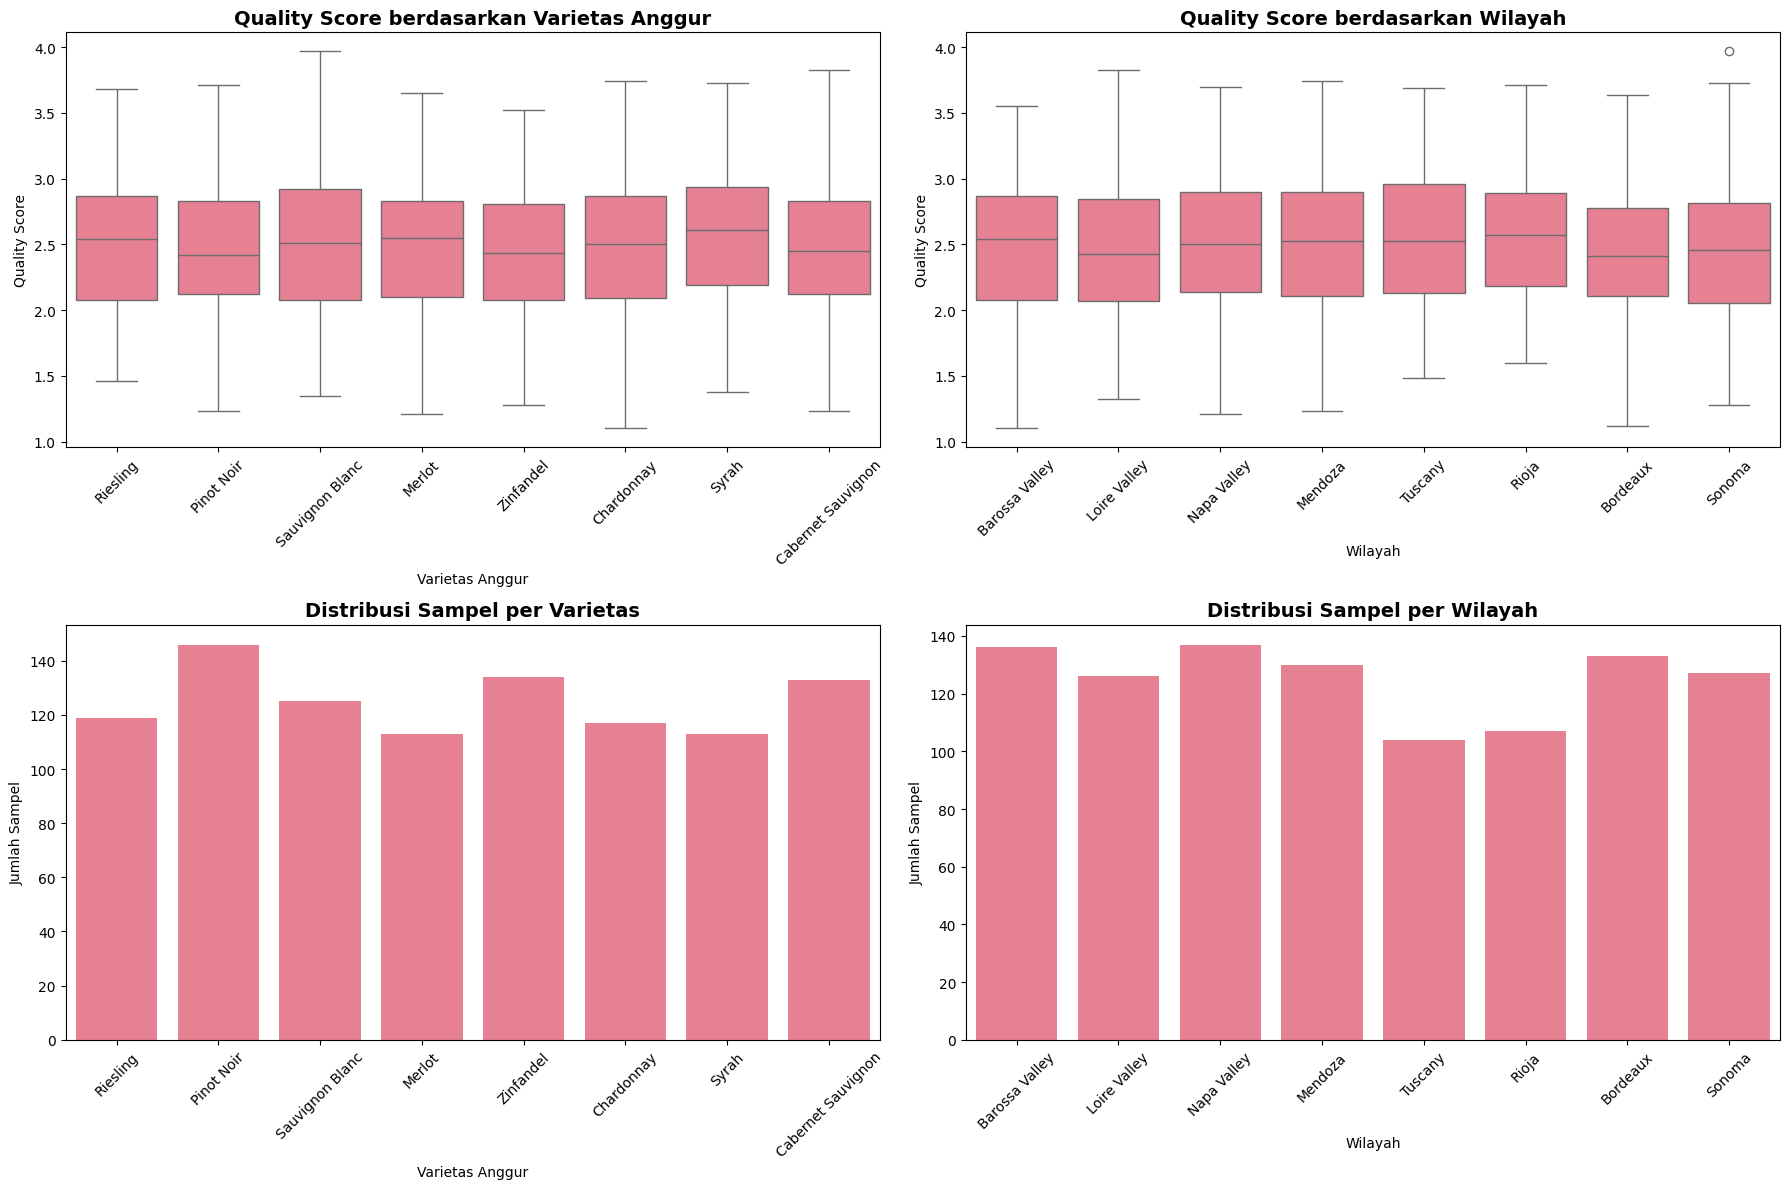


🍇 STATISTIK QUALITY SCORE BERDASARKAN VARIETAS ANGGUR
                    count  mean   std   min   max  range
variety                                                 
Cabernet Sauvignon    133  2.49  0.51  1.23  3.83   2.60
Chardonnay            117  2.50  0.56  1.10  3.74   2.64
Merlot                113  2.48  0.51  1.21  3.65   2.44
Pinot Noir            146  2.47  0.52  1.23  3.71   2.48
Riesling              119  2.49  0.54  1.46  3.68   2.22
Sauvignon Blanc       125  2.53  0.57  1.35  3.97   2.62
Syrah                 113  2.58  0.54  1.38  3.73   2.35
Zinfandel             134  2.44  0.50  1.28  3.52   2.24

🏆 Varietas dengan kualitas tertinggi: Syrah (rata-rata: 2.58)
⚠️ Varietas dengan kualitas terendah: Zinfandel (rata-rata: 2.44)

🌍 STATISTIK QUALITY SCORE BERDASARKAN WILAYAH
                count  mean   std   min   max  range
region                                              
Barossa Valley    136  2.48  0.53  1.10  3.55   2.45
Bordeaux          133  2.43  0.53  1.12 

In [248]:
# === ANALISIS QUALITY SCORE BERDASARKAN VARIABEL KATEGORIKAL ===

# Buat subplot dengan layout 2x2 untuk 4 grafik berbeda
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Box plot: Quality Score berdasarkan Variety (Varietas Anggur)
sns.boxplot(data=df, x='variety', y='quality_score', ax=axes[0,0])
axes[0,0].set_title('Quality Score berdasarkan Varietas Anggur', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Varietas Anggur')
axes[0,0].set_ylabel('Quality Score')
axes[0,0].tick_params(axis='x', rotation=45)  # Rotasi label X agar tidak tumpang tindih

# 2. Box plot: Quality Score berdasarkan Region (Wilayah)
sns.boxplot(data=df, x='region', y='quality_score', ax=axes[0,1])
axes[0,1].set_title('Quality Score berdasarkan Wilayah', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Wilayah')
axes[0,1].set_ylabel('Quality Score')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Count plot: Distribusi Varietas Anggur (berapa banyak sampel per varietas)
sns.countplot(data=df, x='variety', ax=axes[1,0])
axes[1,0].set_title('Distribusi Sampel per Varietas', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Varietas Anggur')
axes[1,0].set_ylabel('Jumlah Sampel')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Count plot: Distribusi Wilayah (berapa banyak sampel per wilayah)
sns.countplot(data=df, x='region', ax=axes[1,1])
axes[1,1].set_title('Distribusi Sampel per Wilayah', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Wilayah')
axes[1,1].set_ylabel('Jumlah Sampel')
axes[1,1].tick_params(axis='x', rotation=45)

# Sesuaikan layout agar tidak tumpang tindih
plt.tight_layout()
plt.show()

# ANALISIS STATISTIK DETAIL PER KATEGORI
print("\n" + "="*70)
print("🍇 STATISTIK QUALITY SCORE BERDASARKAN VARIETAS ANGGUR")
print("="*70)

# Analisis per varietas dengan penjelasan
variety_stats = df.groupby('variety', observed=False)['quality_score'].agg([
    'count',    # jumlah sampel
    'mean',     # rata-rata
    'std',      # standar deviasi
    'min',      # nilai minimum
    'max'       # nilai maksimum
]).round(2)

# Tambahkan kolom interpretasi
variety_stats['range'] = variety_stats['max'] - variety_stats['min']
print(variety_stats)

# Identifikasi varietas terbaik dan terburuk
best_variety = variety_stats['mean'].idxmax()
worst_variety = variety_stats['mean'].idxmin()
print(f"\n🏆 Varietas dengan kualitas tertinggi: {best_variety} (rata-rata: {variety_stats.loc[best_variety, 'mean']:.2f})")
print(f"⚠️ Varietas dengan kualitas terendah: {worst_variety} (rata-rata: {variety_stats.loc[worst_variety, 'mean']:.2f})")

print("\n" + "="*70)
print("🌍 STATISTIK QUALITY SCORE BERDASARKAN WILAYAH")
print("="*70)

# Analisis per wilayah
region_stats = df.groupby('region', observed=False)['quality_score'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(2)

# Tambahkan kolom range
region_stats['range'] = region_stats['max'] - region_stats['min']
print(region_stats)

# Identifikasi wilayah terbaik dan terburuk
best_region = region_stats['mean'].idxmax()
worst_region = region_stats['mean'].idxmin()
print(f"\n🏆 Wilayah dengan kualitas tertinggi: {best_region} (rata-rata: {region_stats.loc[best_region, 'mean']:.2f})")
print(f"⚠️ Wilayah dengan kualitas terendah: {worst_region} (rata-rata: {region_stats.loc[worst_region, 'mean']:.2f})")

# Analisis variabilitas
print(f"\n📊 ANALISIS VARIABILITAS:")
print(f"Varietas dengan konsistensi tertinggi (std terendah): {variety_stats['std'].idxmin()} (std: {variety_stats['std'].min():.2f})")
print(f"Wilayah dengan konsistensi tertinggi (std terendah): {region_stats['std'].idxmin()} (std: {region_stats['std'].min():.2f})")

**Hubungan Antar Variabel Kunci (Pairwise Relationships)**

🔍 Menganalisis hubungan 4 variabel kunci dengan quality score


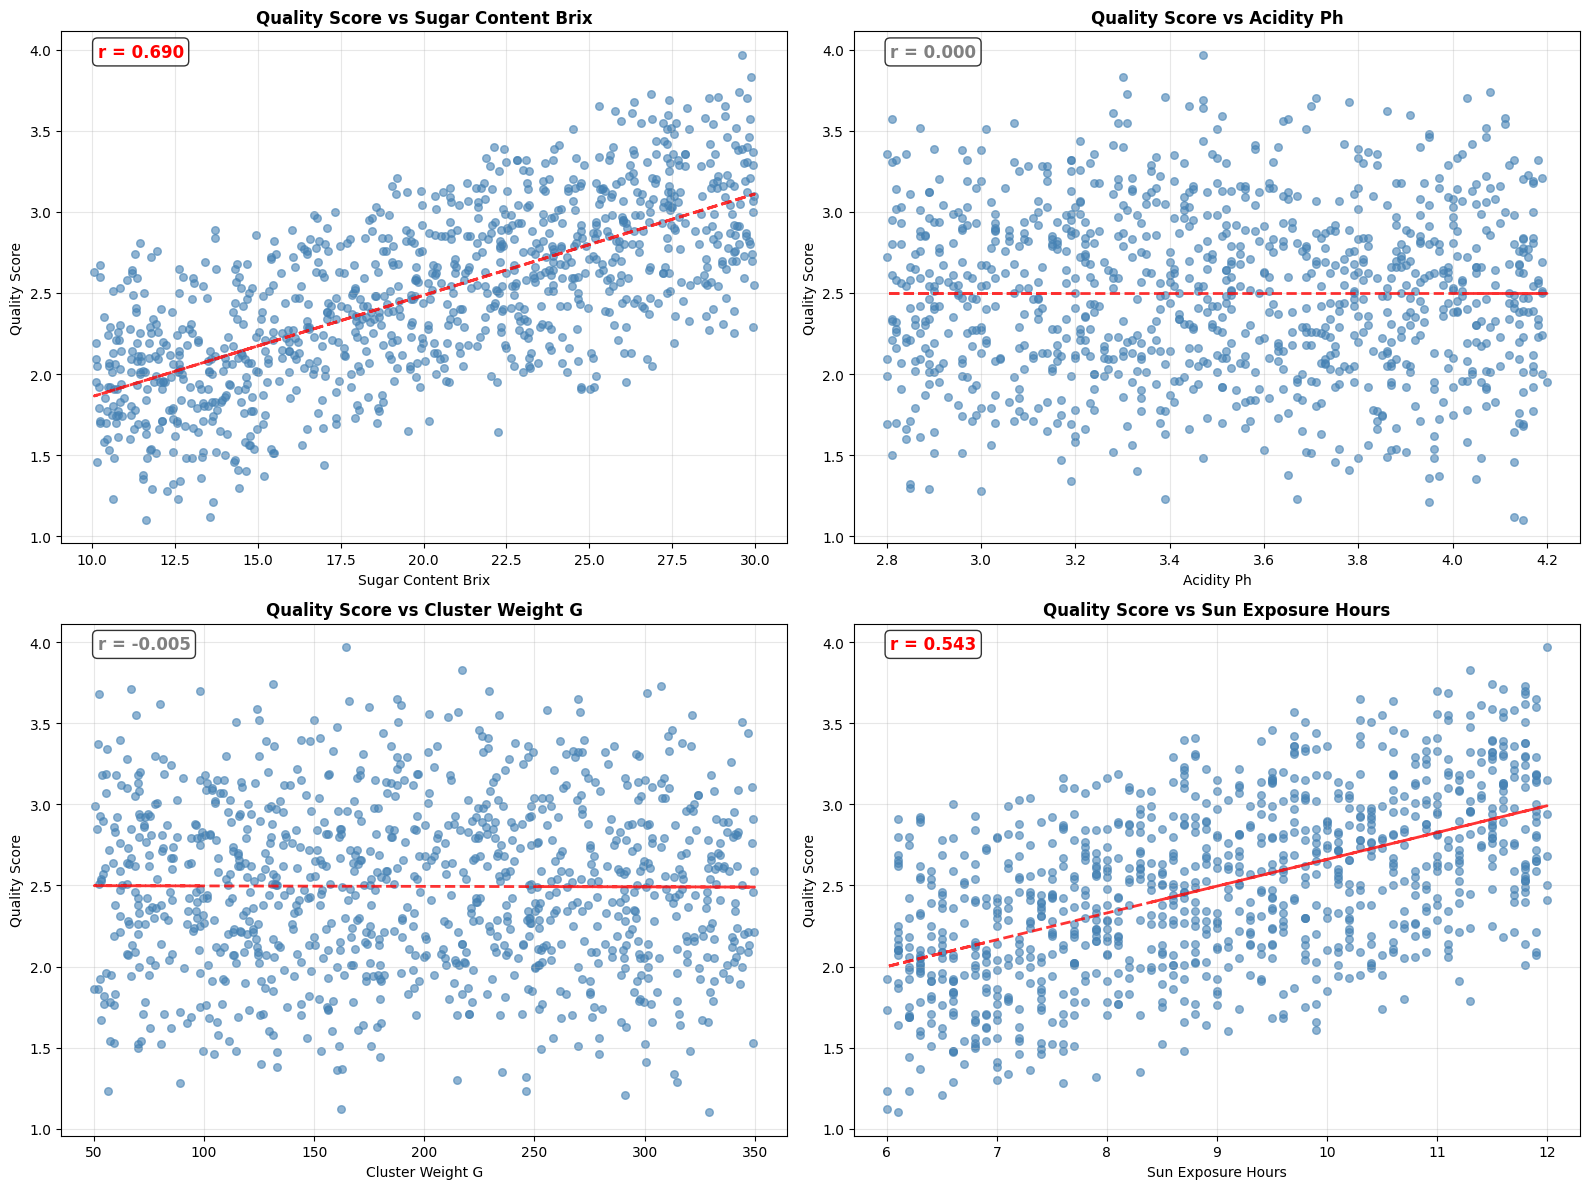


🔭 ANALISIS KORELASI VARIABEL KUNCI
sugar_content_brix   :  0.690 🔴 Kuat ⬆️ Positif
acidity_ph           :  0.000 🟢 Lemah ⬆️ Positif
cluster_weight_g     : -0.005 🟢 Lemah ⬇️ Negatif
sun_exposure_hours   :  0.543 🔴 Kuat ⬆️ Positif

🏆 VARIABEL PALING BERPENGARUH:
sugar_content_brix dengan korelasi 0.690


In [249]:
# === ANALISIS HUBUNGAN VARIABEL KUNCI DENGAN QUALITY SCORE ===

# Pilih 4 variabel kunci berdasarkan domain knowledge
key_variables = [
    'sugar_content_brix',  # Kandungan gula - penting untuk rasa
    'acidity_ph',          # Tingkat keasaman - mempengaruhi balance rasa
    'cluster_weight_g',    # Berat cluster - indikator ukuran/produktivitas
    'sun_exposure_hours'   # Paparan sinar matahari - faktor lingkungan penting
]

print(f"🔍 Menganalisis hubungan 4 variabel kunci dengan quality score")

# Buat subplot 2x2 untuk scatter plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()  # Ubah array 2D menjadi 1D untuk kemudahan indexing

# Loop untuk membuat scatter plot setiap variabel
for i, variable in enumerate(key_variables):
    # 1. Buat scatter plot
    axes[i].scatter(df[variable], df['quality_score'], alpha=0.6, s=30, color='steelblue')
    
    # 2. Tambahkan trend line (garis regresi linear)
    # Hilangkan nilai NaN untuk perhitungan trend line
    clean_x = df[variable].dropna()
    clean_y = df['quality_score'][df[variable].notna()]
    
    if len(clean_x) > 1:  # Pastikan ada data untuk regresi
        # Hitung koefisien regresi linear
        z = np.polyfit(clean_x, clean_y, 1)  # derajat 1 = linear
        p = np.poly1d(z)  # buat fungsi polynomial
        
        # Plot trend line
        axes[i].plot(clean_x, p(clean_x), "r--", alpha=0.8, linewidth=2, label='Trend Line')
    
    # 3. Atur label dan judul
    variable_name = variable.replace('_', ' ').title()  # Format nama yang lebih rapi
    axes[i].set_xlabel(variable_name)
    axes[i].set_ylabel('Quality Score')
    axes[i].set_title(f'Quality Score vs {variable_name}', fontweight='bold')
    axes[i].grid(True, alpha=0.3)  # Tambahkan grid
    
    # 4. Hitung dan tampilkan korelasi
    correlation = df[variable].corr(df['quality_score'])
    
    # Tentukan warna berdasarkan kekuatan korelasi
    if abs(correlation) > 0.5:
        corr_color = 'red' if correlation > 0 else 'blue'
    else:
        corr_color = 'gray'
    
    # Tambahkan text box dengan nilai korelasi
    axes[i].text(0.05, 0.95, f'r = {correlation:.3f}', 
                transform=axes[i].transAxes,  # gunakan koordinat relatif (0-1)
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                fontsize=12, fontweight='bold', color=corr_color)

# Sesuaikan layout
plt.tight_layout()
plt.show()

# ANALISIS KORELASI DETAIL
print("\n" + "="*70)
print("🔭 ANALISIS KORELASI VARIABEL KUNCI")
print("="*70)

# Hitung dan tampilkan korelasi untuk semua variabel kunci
corr_results = []
for variable in key_variables:
    correlation = df[variable].corr(df['quality_score'])
    corr_results.append((variable, correlation))
    
    # Interpretasi kekuatan korelasi
    abs_corr = abs(correlation)
    if abs_corr >= 0.7:
        strength = "Sangat Kuat"
        emoji = "🔥"
    elif abs_corr >= 0.5:
        strength = "Kuat"
        emoji = "🔴"
    elif abs_corr >= 0.3:
        strength = "Sedang"
        emoji = "🟡"
    else:
        strength = "Lemah"
        emoji = "🟢"
    
    # Arah korelasi
    direction = "Positif" if correlation > 0 else "Negatif"
    direction_emoji = "⬆️" if correlation > 0 else "⬇️"
    
    print(f"{variable:20} : {correlation:6.3f} {emoji} {strength} {direction_emoji} {direction}")

# Urutkan berdasarkan kekuatan korelasi
corr_results.sort(key=lambda x: abs(x[1]), reverse=True)
strongest_var = corr_results[0]

print(f"\n🏆 VARIABEL PALING BERPENGARUH:")
print(f"{strongest_var[0]} dengan korelasi {strongest_var[1]:.3f}")

**Analisis Faktor Lingkungan**

🌱 Menganalisis 3 faktor lingkungan


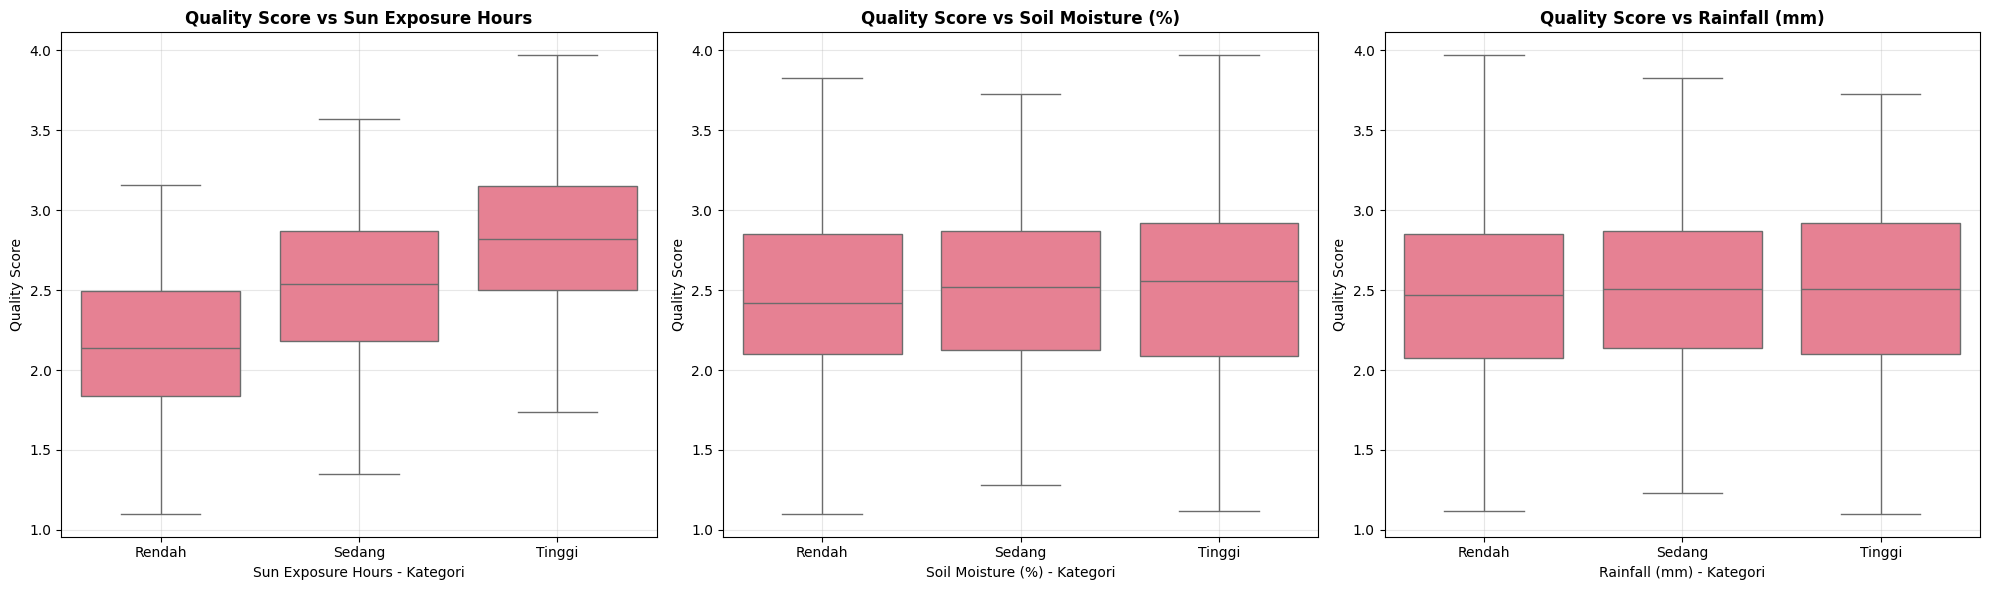


🌍 DAMPAK FAKTOR LINGKUNGAN TERHADAP KUALITAS ANGGUR

🌡️ SUN EXPOSURE HOURS:
--------------------------------------------------
                             count   mean    std
sun_exposure_hours_category                     
Rendah                         348  2.164  0.444
Sedang                         333  2.530  0.465
Tinggi                         319  2.817  0.461

📈 Analisis:
  - Kategori terbaik: Tinggi (rata-rata: 2.817)
  - Kategori terburuk: Rendah (rata-rata: 2.164)
  - Selisih dampak: 0.653 poin quality score
  - Tingkat dampak: 🔥 SIGNIFIKAN

🌡️ SOIL MOISTURE PERCENT:
--------------------------------------------------
                                count   mean    std
soil_moisture_percent_category                     
Rendah                            332  2.466  0.527
Sedang                            334  2.498  0.493
Tinggi                            329  2.520  0.564

📈 Analisis:
  - Kategori terbaik: Tinggi (rata-rata: 2.520)
  - Kategori terburuk: Rendah (rata-rata

In [250]:
# === ANALISIS FAKTOR LINGKUNGAN TERHADAP KUALITAS ===

# Definisikan variabel lingkungan yang akan dianalisis
environmental_vars = [
    'sun_exposure_hours',    # Paparan sinar matahari
    'soil_moisture_percent', # Kelembaban tanah
    'rainfall_mm'           # Curah hujan
]

print(f"🌱 Menganalisis {len(environmental_vars)} faktor lingkungan")

# Buat subplot untuk 3 faktor lingkungan
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Dictionary untuk menyimpan statistik kategori
category_stats = {}

for i, variable in enumerate(environmental_vars):
    # Buat kategori berdasarkan kuartil (Low: Q1, Medium: Q1-Q3, High: >Q3)
    q1 = df[variable].quantile(0.33)
    q3 = df[variable].quantile(0.67)
    
    # Buat kategorisasi yang lebih informatif
    category_column = f'{variable}_category'
    df[category_column] = pd.cut(
        df[variable], 
        bins=[df[variable].min()-0.001, q1, q3, df[variable].max()+0.001], 
        labels=['Rendah', 'Sedang', 'Tinggi'],
        include_lowest=True
    )
    
    # Buat box plot berdasarkan kategori
    sns.boxplot(data=df, x=category_column, y='quality_score', ax=axes[i])
    
    # Format judul dan label
    var_title = variable.replace('_', ' ').title().replace('Mm', '(mm)').replace('Percent', '(%)')
    axes[i].set_title(f'Quality Score vs {var_title}', fontweight='bold', fontsize=12)
    axes[i].set_xlabel(f'{var_title} - Kategori')
    axes[i].set_ylabel('Quality Score')
    axes[i].grid(True, alpha=0.3)
    
    # Simpan statistik untuk analisis
    group_stats = df.groupby(category_column, observed=False)['quality_score'].agg(['count', 'mean', 'std']).round(3)
    category_stats[variable] = group_stats

# Sesuaikan layout
plt.tight_layout()
plt.show()

# ANALISIS STATISTIK DETAIL FAKTOR LINGKUNGAN
print("\n" + "="*80)
print("🌍 DAMPAK FAKTOR LINGKUNGAN TERHADAP KUALITAS ANGGUR")
print("="*80)

for variable in environmental_vars:
    var_name = variable.replace('_', ' ').title()
    print(f"\n🌡️ {var_name.upper()}:")
    print("-" * 50)
    
    group_stats = category_stats[variable]
    print(group_stats)
    
    # Analisis perbedaan antar kategori
    mean_values = group_stats['mean'].values
    if len(mean_values) >= 2:
        max_diff = max(mean_values) - min(mean_values)
        best_category = group_stats['mean'].idxmax()
        worst_category = group_stats['mean'].idxmin()
        
        print(f"\n📈 Analisis:")
        print(f"  - Kategori terbaik: {best_category} (rata-rata: {group_stats.loc[best_category, 'mean']:.3f})")
        print(f"  - Kategori terburuk: {worst_category} (rata-rata: {group_stats.loc[worst_category, 'mean']:.3f})")
        print(f"  - Selisih dampak: {max_diff:.3f} poin quality score")
        
        # Interpretasi bisnis
        if max_diff > 0.5:
            impact_level = "SIGNIFIKAN"
            emoji = "🔥"
        elif max_diff > 0.2:
            impact_level = "SEDANG"
            emoji = "🟡"
        else:
            impact_level = "RENDAH"
            emoji = "🟢"
            
        print(f"  - Tingkat dampak: {emoji} {impact_level}")

# Hapus kolom temporary kategori untuk menghemat memori
for variable in environmental_vars:
    category_column = f'{variable}_category'
    if category_column in df.columns:
        df.drop(category_column, axis=1, inplace=True)

**Analisis Temporal (Harvest Date)**

📅 Menganalisis pola temporal kualitas anggur
Periode data: 2023 - 2023


C:\Users\mhdfa\AppData\Local\Temp\ipykernel_15520\3474287762.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels([bulan_nama[i-1] for i in range(1, 13)])


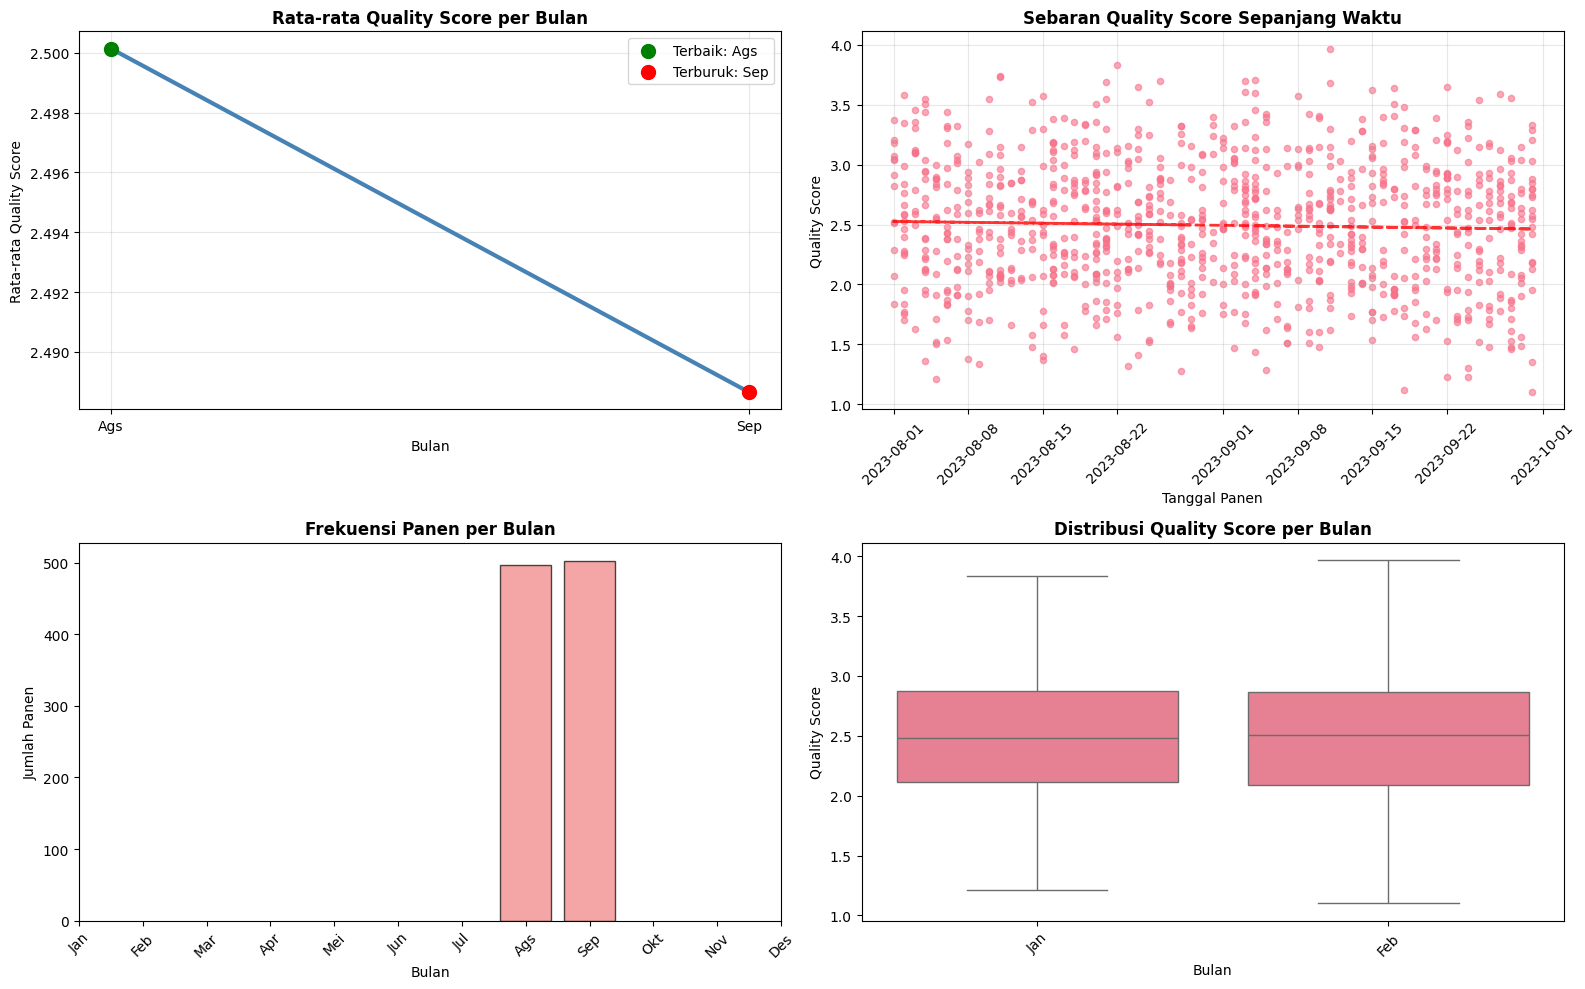


📅 ANALISIS POLA TEMPORAL KUALITAS ANGGUR

🗺 STATISTIK QUALITY SCORE PER BULAN:
     count   mean    std   min   max
Ags    497  2.500  0.519  1.21  3.83
Sep    503  2.489  0.539  1.10  3.97

🌡️ POLA MUSIMAN:
Bulan dengan kualitas tertinggi: Ags (rata-rata: 2.500)
Bulan dengan kualitas terendah: Sep (rata-rata: 2.489)
Selisih kualitas musiman: 0.011 poin

📉 VARIABILITAS MUSIMAN:
Standard deviasi antar bulan: 0.008
🟢 Pengaruh musiman RENDAH - kualitas relatif stabil sepanjang tahun

🧹 Membersihkan kolom temporary...
✅ Analisis temporal selesai! Kolom harvest_month disimpan untuk modeling.


In [251]:
# === ANALISIS TEMPORAL - POLA KUALITAS BERDASARKAN WAKTU PANEN ===

# Ekstrak informasi waktu dari harvest_date
df['harvest_month'] = df['harvest_date'].dt.month    # Bulan panen (1-12)
df['harvest_day'] = df['harvest_date'].dt.day        # Hari dalam bulan (1-31)
df['harvest_year'] = df['harvest_date'].dt.year      # Tahun panen

print(f"📅 Menganalisis pola temporal kualitas anggur")
print(f"Periode data: {df['harvest_year'].min()} - {df['harvest_year'].max()}")

# Buat subplot 2x2 untuk analisis temporal
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. GRAFIK GARIS: Rata-rata Quality Score per Bulan
monthly_quality = df.groupby('harvest_month', observed=False)['quality_score'].mean()
axes[0,0].plot(monthly_quality.index, monthly_quality.values, 
               marker='o', linewidth=3, markersize=8, color='steelblue')
axes[0,0].set_title('Rata-rata Quality Score per Bulan', fontweight='bold')
axes[0,0].set_xlabel('Bulan')
axes[0,0].set_ylabel('Rata-rata Quality Score')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xticks(range(1, 13))  # Set tick untuk semua bulan

# Tambahkan label bulan
bulan_nama = ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 
              'Jul', 'Ags', 'Sep', 'Okt', 'Nov', 'Des']
axes[0,0].set_xticklabels([bulan_nama[i-1] for i in range(1, 13)])

# Highlight bulan dengan kualitas tertinggi dan terendah
best_month = monthly_quality.idxmax()
worst_month = monthly_quality.idxmin()
axes[0,0].scatter(best_month, monthly_quality[best_month], 
                 color='green', s=100, zorder=5, label=f'Terbaik: {bulan_nama[best_month-1]}')
axes[0,0].scatter(worst_month, monthly_quality[worst_month], 
                 color='red', s=100, zorder=5, label=f'Terburuk: {bulan_nama[worst_month-1]}')
axes[0,0].legend()

# 2. SCATTER PLOT: Quality Score sepanjang waktu
axes[0,1].scatter(df['harvest_date'], df['quality_score'], alpha=0.6, s=20)
axes[0,1].set_title('Sebaran Quality Score Sepanjang Waktu', fontweight='bold')
axes[0,1].set_xlabel('Tanggal Panen')
axes[0,1].set_ylabel('Quality Score')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].tick_params(axis='x', rotation=45)

# Tambahkan trend line jika ada pola waktu yang jelas
if len(df['harvest_date'].unique()) > 10:
    # Convert datetime to numeric untuk regresi
    numeric_dates = pd.to_numeric(df['harvest_date'])
    z = np.polyfit(numeric_dates, df['quality_score'], 1)
    p = np.poly1d(z)
    axes[0,1].plot(df['harvest_date'], p(numeric_dates), "r--", alpha=0.8, linewidth=2)

# 3. BAR CHART: Frekuensi panen per bulan
monthly_counts = df['harvest_month'].value_counts().sort_index()
axes[1,0].bar(monthly_counts.index, monthly_counts.values, 
              color='lightcoral', alpha=0.7, edgecolor='black')
axes[1,0].set_title('Frekuensi Panen per Bulan', fontweight='bold')
axes[1,0].set_xlabel('Bulan')
axes[1,0].set_ylabel('Jumlah Panen')
axes[1,0].set_xticks(range(1, 13))
axes[1,0].set_xticklabels([bulan_nama[i-1] for i in range(1, 13)])
axes[1,0].tick_params(axis='x', rotation=45)

# 4. BOX PLOT: Distribusi quality score per bulan
sns.boxplot(data=df, x='harvest_month', y='quality_score', ax=axes[1,1])
axes[1,1].set_title('Distribusi Quality Score per Bulan', fontweight='bold')
axes[1,1].set_xlabel('Bulan')
axes[1,1].set_ylabel('Quality Score')
axes[1,1].set_xticklabels([bulan_nama[i-1] for i in range(1, 13)])
axes[1,1].tick_params(axis='x', rotation=45)

# Sesuaikan layout
plt.tight_layout()
plt.show()

# ANALISIS STATISTIK TEMPORAL DETAIL
print("\n" + "="*70)
print("📅 ANALISIS POLA TEMPORAL KUALITAS ANGGUR")
print("="*70)

# Statistik per bulan
print("\n🗺 STATISTIK QUALITY SCORE PER BULAN:")
monthly_stats = df.groupby('harvest_month', observed=False)['quality_score'].agg([
    'count', 'mean', 'std', 'min', 'max'
]).round(3)

# Tambahkan nama bulan untuk kemudahan baca
monthly_stats.index = [bulan_nama[i-1] for i in monthly_stats.index]
print(monthly_stats)

# Identifikasi pola musiman
print(f"\n🌡️ POLA MUSIMAN:")
print(f"Bulan dengan kualitas tertinggi: {bulan_nama[best_month-1]} (rata-rata: {monthly_quality[best_month]:.3f})")
print(f"Bulan dengan kualitas terendah: {bulan_nama[worst_month-1]} (rata-rata: {monthly_quality[worst_month]:.3f})")
print(f"Selisih kualitas musiman: {monthly_quality[best_month] - monthly_quality[worst_month]:.3f} poin")

# Analisis variabilitas
seasonal_variation = monthly_quality.std()
print(f"\n📉 VARIABILITAS MUSIMAN:")
print(f"Standard deviasi antar bulan: {seasonal_variation:.3f}")
if seasonal_variation > 0.3:
    print("🔥 Pengaruh musiman SIGNIFIKAN - timing panen sangat penting!")
elif seasonal_variation > 0.1:
    print("🟡 Pengaruh musiman SEDANG - perlu dipertimbangkan dalam perencanaan")
else:
    print("🟢 Pengaruh musiman RENDAH - kualitas relatif stabil sepanjang tahun")

# Cleanup kolom temporary yang tidak diperlukan untuk modeling
print(f"\n🧹 Membersihkan kolom temporary...")
if 'harvest_day' in df.columns:
    df.drop('harvest_day', axis=1, inplace=True)
if 'harvest_year' in df.columns:
    df.drop('harvest_year', axis=1, inplace=True)
    
print(f"✅ Analisis temporal selesai! Kolom harvest_month disimpan untuk modeling.")

8. **Analisis Komposisi Kimia**

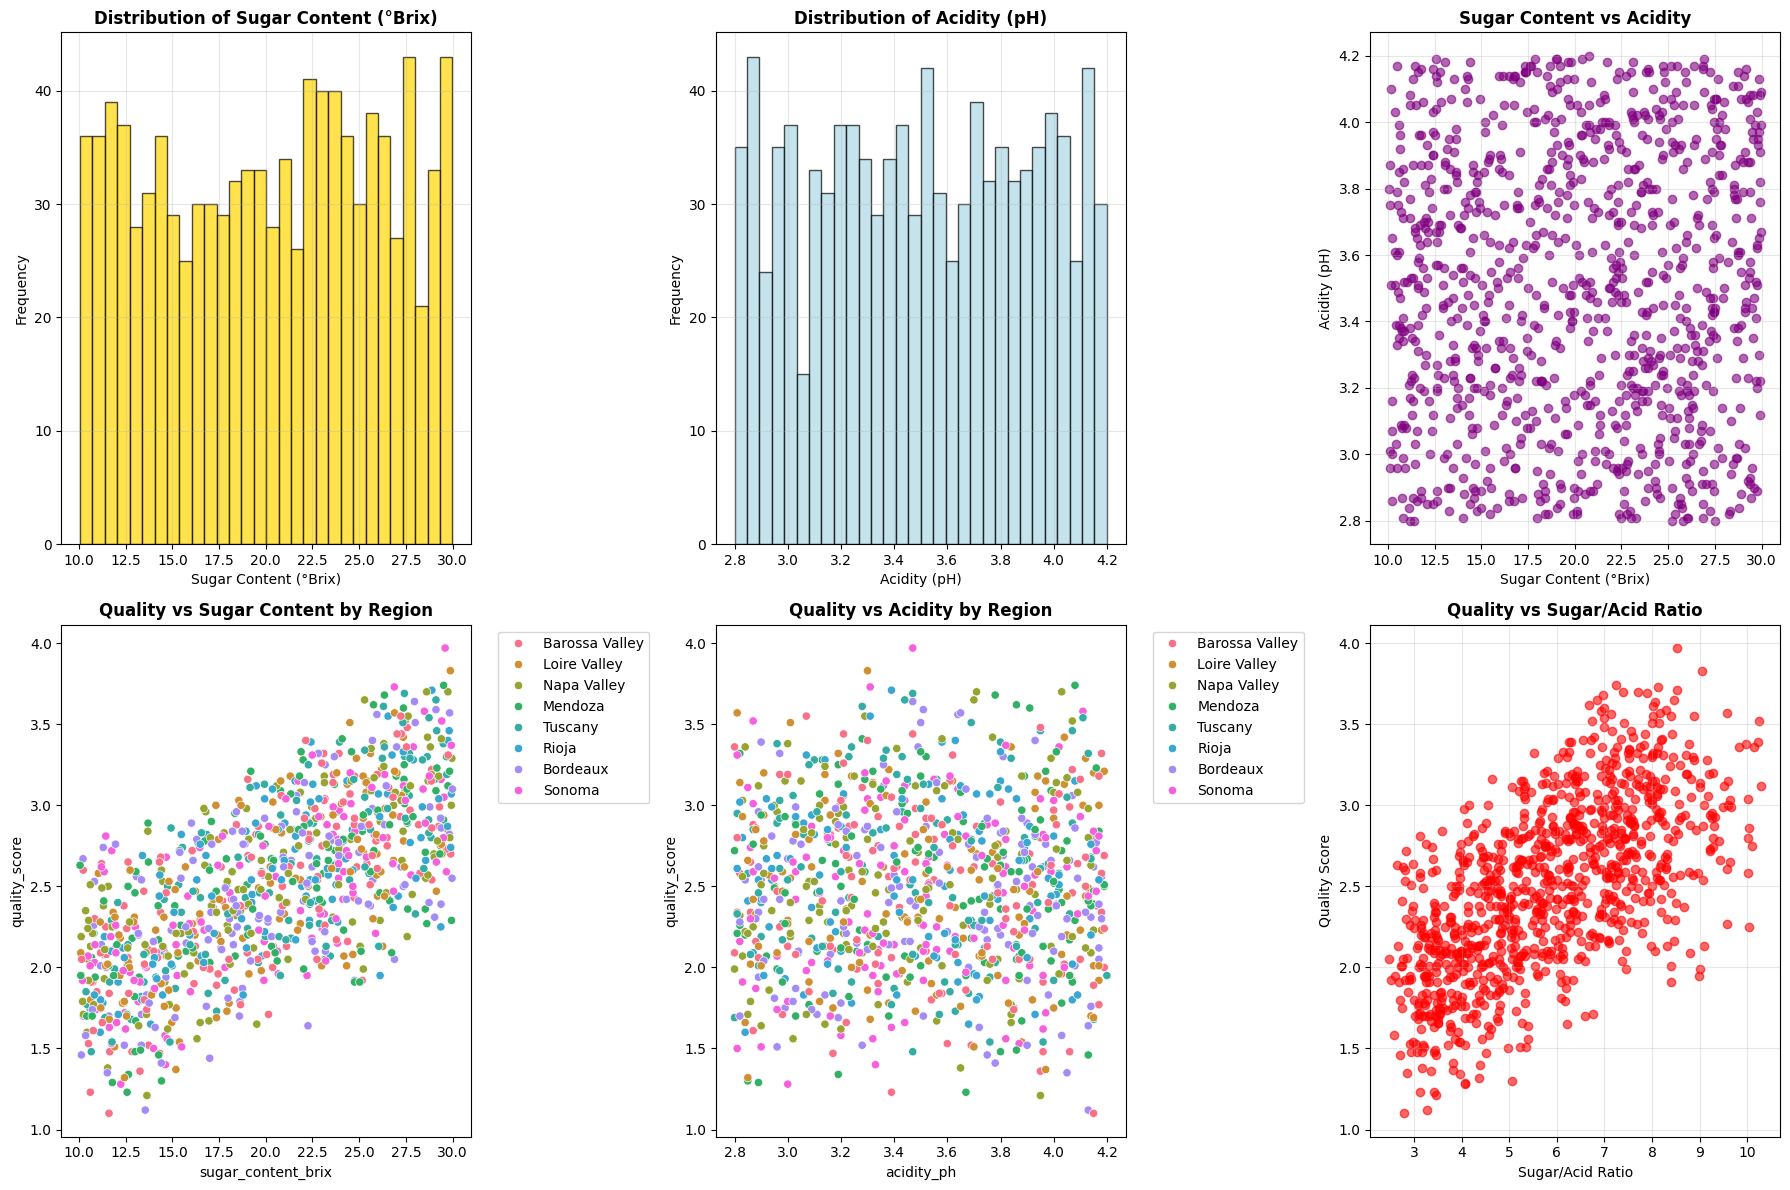

=== CHEMICAL COMPOSITION ANALYSIS ===
Sugar Content Statistics:
Mean: 20.14°Brix
Range: 10.06 - 29.99°Brix

Acidity Statistics:
Mean pH: 3.50
Range: 2.80 - 4.20 pH

Correlation with Quality:
Sugar Content: 0.690
Acidity: 0.000
Sugar/Acid Ratio: 0.636


In [252]:
# Analisis komposisi kimia anggur
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Sugar content distribution
axes[0,0].hist(df['sugar_content_brix'], bins=30, alpha=0.7, color='gold', edgecolor='black')
axes[0,0].set_title('Distribution of Sugar Content (°Brix)', fontweight='bold')
axes[0,0].set_xlabel('Sugar Content (°Brix)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# Acidity distribution
axes[0,1].hist(df['acidity_ph'].dropna(), bins=30, alpha=0.7, color='lightblue', edgecolor='black')
axes[0,1].set_title('Distribution of Acidity (pH)', fontweight='bold')
axes[0,1].set_xlabel('Acidity (pH)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# Sugar vs Acidity relationship
axes[0,2].scatter(df['sugar_content_brix'], df['acidity_ph'], alpha=0.6, color='purple')
axes[0,2].set_title('Sugar Content vs Acidity', fontweight='bold')
axes[0,2].set_xlabel('Sugar Content (°Brix)')
axes[0,2].set_ylabel('Acidity (pH)')
axes[0,2].grid(True, alpha=0.3)

# Quality vs Sugar content dengan region
sns.scatterplot(data=df, x='sugar_content_brix', y='quality_score', hue='region', ax=axes[1,0])
axes[1,0].set_title('Quality vs Sugar Content by Region', fontweight='bold')
axes[1,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Quality vs Acidity dengan region
sns.scatterplot(data=df.dropna(subset=['acidity_ph']), x='acidity_ph', y='quality_score', hue='region', ax=axes[1,1])
axes[1,1].set_title('Quality vs Acidity by Region', fontweight='bold')
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Sugar/Acid balance analysis
df['sugar_acid_ratio'] = df['sugar_content_brix'] / df['acidity_ph']
axes[1,2].scatter(df['sugar_acid_ratio'], df['quality_score'], alpha=0.6, color='red')
axes[1,2].set_title('Quality vs Sugar/Acid Ratio', fontweight='bold')
axes[1,2].set_xlabel('Sugar/Acid Ratio')
axes[1,2].set_ylabel('Quality Score')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Chemical composition statistics
print("=== CHEMICAL COMPOSITION ANALYSIS ===")
print("Sugar Content Statistics:")
print(f"Mean: {df['sugar_content_brix'].mean():.2f}°Brix")
print(f"Range: {df['sugar_content_brix'].min():.2f} - {df['sugar_content_brix'].max():.2f}°Brix")

print("\nAcidity Statistics:")
print(f"Mean pH: {df['acidity_ph'].mean():.2f}")
print(f"Range: {df['acidity_ph'].min():.2f} - {df['acidity_ph'].max():.2f} pH")

print("\nCorrelation with Quality:")
print(f"Sugar Content: {df['sugar_content_brix'].corr(df['quality_score']):.3f}")
print(f"Acidity: {df['acidity_ph'].corr(df['quality_score']):.3f}")
print(f"Sugar/Acid Ratio: {df['sugar_acid_ratio'].corr(df['quality_score']):.3f}")

# Cleanup temporary column
df.drop('sugar_acid_ratio', axis=1, inplace=True)

### **4. Data Preparation**

**4.1. Data Cleaning**

In [253]:
# === PEMBERSIHAN DATA (DATA CLEANING) ===

# 1. Tangani missing values dengan imputasi median
print("🧹 MENGATASI MISSING VALUES:")
print(f"Missing values sebelum cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Gunakan SimpleImputer dengan strategi median (lebih robust terhadap outlier)
imputer = SimpleImputer(strategy='median')

# Isi missing values pada kolom acidity_ph
df['acidity_ph'] = imputer.fit_transform(df[['acidity_ph']]).flatten()

# Isi missing values pada kolom soil_moisture_percent
df['soil_moisture_percent'] = imputer.fit_transform(df[['soil_moisture_percent']]).flatten()

print(f"\nMissing values setelah cleaning:")
print(df.isnull().sum().sum())  # Total missing values

# 2. Konversi harvest_date ke format datetime jika belum
df['harvest_date'] = pd.to_datetime(df['harvest_date'], errors='coerce')

🧹 MENGATASI MISSING VALUES:
Missing values sebelum cleaning:
acidity_ph               5
soil_moisture_percent    5
dtype: int64

Missing values setelah cleaning:
0


In [254]:


# 3. Ringkasan statistik setelah cleaning
print(f"\n📊 STATISTIK SETELAH CLEANING:")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Tipe data sudah sesuai: harvest_date -> {df['harvest_date'].dtype}")
print(f"Ukuran dataset final: {df.shape}")
print(f"Kolom numerik: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"Kolom kategorikal: {len(df.select_dtypes(include=['object']).columns)}")
print(f"Data siap untuk tahap selanjutnya: ✅")


📊 STATISTIK SETELAH CLEANING:
Total missing values: 0
Tipe data sudah sesuai: harvest_date -> datetime64[ns]
Ukuran dataset final: (1000, 13)
Kolom numerik: 10
Kolom kategorikal: 2
Data siap untuk tahap selanjutnya: ✅


**4.2. Feature Engineering dan Transformasi Data**

In [255]:
# === FEATURE ENGINEERING DAN TRANSFORMASI DATA ===

# 1. Encode variabel kategorikal menjadi numerik
print("🏷️ ENCODING VARIABEL KATEGORIKAL:")

# Buat label encoder untuk setiap variabel kategorikal
le_variety = LabelEncoder()  # Encoder untuk varietas anggur
le_region = LabelEncoder()   # Encoder untuk wilayah

# Transform variabel kategorikal menjadi numerik
df['variety_encoded'] = le_variety.fit_transform(df['variety'])
df['region_encoded'] = le_region.fit_transform(df['region'])

print(f"Variety: {df['variety'].nunique()} kategori -> encoded ke 0-{df['variety_encoded'].max()}")
print(f"Region: {df['region'].nunique()} kategori -> encoded ke 0-{df['region_encoded'].max()}")

# 2. Buat fitur baru (Feature Engineering)
print(f"\n🛠️ PEMBUATAN FITUR BARU:")

# Rasio gula-asam (indikator balance rasa)
df['sugar_acid_ratio'] = df['sugar_content_brix'] / df['acidity_ph']
print(f"1. Sugar-Acid Ratio: menggabungkan kandungan gula dan keasaman")

# Ekstrak bulan dari tanggal panen (faktor musiman)
df['harvest_month'] = df['harvest_date'].dt.month
print(f"2. Harvest Month: ekstrak bulan panen (1-12) untuk analisis musiman")

# 3. Siapkan dataset untuk modeling
print(f"\n🎯 PERSIAPAN DATASET MODELING:")

# Kolom yang akan dihapus (tidak diperlukan untuk modeling)
columns_to_drop = [
    'sample_id',      # ID tidak berguna untuk prediksi
    'variety',        # Sudah di-encode jadi variety_encoded
    'region',         # Sudah di-encode jadi region_encoded  
    'harvest_date'    # Sudah di-ekstrak jadi harvest_month
]

# Buat dataset clean untuk modeling
df_clean = df.drop(columns=columns_to_drop)

print(f"Kolom yang dihapus: {columns_to_drop}")
print(f"Dataset siap modeling: {df_clean.shape}")
print(f"Fitur yang digunakan: {list(df_clean.columns)}")
print(f"\n✅ Feature engineering selesai!")

# Update df untuk consistency
df = df_clean.copy()

🏷️ ENCODING VARIABEL KATEGORIKAL:
Variety: 8 kategori -> encoded ke 0-7
Region: 8 kategori -> encoded ke 0-7

🛠️ PEMBUATAN FITUR BARU:
1. Sugar-Acid Ratio: menggabungkan kandungan gula dan keasaman
2. Harvest Month: ekstrak bulan panen (1-12) untuk analisis musiman

🎯 PERSIAPAN DATASET MODELING:
Kolom yang dihapus: ['sample_id', 'variety', 'region', 'harvest_date']
Dataset siap modeling: (1000, 12)
Fitur yang digunakan: ['quality_score', 'sugar_content_brix', 'acidity_ph', 'cluster_weight_g', 'berry_size_mm', 'sun_exposure_hours', 'soil_moisture_percent', 'rainfall_mm', 'harvest_month', 'variety_encoded', 'region_encoded', 'sugar_acid_ratio']

✅ Feature engineering selesai!


**4.3 Data Splitting: train/validation/test (70/15/15)**

In [256]:
# === PEMBAGIAN DATA (DATA SPLITTING) ===
# Pisahkan data menjadi 70% training, 15% validation, 15% testing

# Pisahkan fitur (X) dan target variable (y)
X = df.drop('quality_score', axis=1)  # Fitur input (semua kolom kecuali quality_score)
y = df['quality_score']               # Target variable yang ingin diprediksi

print(f"📊 INFORMASI DATASET:")
print(f"Ukuran fitur (X): {X.shape}")
print(f"Ukuran target (y): {y.shape}")
print(f"Nama fitur: {list(X.columns)}")

# Langkah 1: Pisahkan 70% untuk training, 30% untuk sementara
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, 
    test_size=0.30,     # 30% untuk validasi + testing
    random_state=42,    # Untuk reproducibility
    shuffle=True        # Acak data sebelum split
)

# Pisahkan 30% sisanya menjadi 15% validation dan 15% testing
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, 
    test_size=0.50,     # 50% dari 30% = 15% dari total
    random_state=42, 
    shuffle=True
)

print(f"\n📊 HASIL PEMBAGIAN DATA:")
print(f"Training set   : {X_train.shape[0]} sampel ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set : {X_val.shape[0]} sampel ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"Test set       : {X_test.shape[0]} sampel ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"Total          : {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]} sampel")

# Periksa distribusi target variable di setiap set
print(f"\n🎯 DISTRIBUSI TARGET VARIABLE:")
print(f"Training   - Mean: {y_train.mean():.3f}, Std: {y_train.std():.3f}")
print(f"Validation - Mean: {y_val.mean():.3f}, Std: {y_val.std():.3f}")
print(f"Test       - Mean: {y_test.mean():.3f}, Std: {y_test.std():.3f}")
print(f"\n✅ Pembagian data selesai dengan distribusi yang seimbang!")

📊 INFORMASI DATASET:
Ukuran fitur (X): (1000, 11)
Ukuran target (y): (1000,)
Nama fitur: ['sugar_content_brix', 'acidity_ph', 'cluster_weight_g', 'berry_size_mm', 'sun_exposure_hours', 'soil_moisture_percent', 'rainfall_mm', 'harvest_month', 'variety_encoded', 'region_encoded', 'sugar_acid_ratio']

📊 HASIL PEMBAGIAN DATA:
Training set   : 700 sampel (70.0%)
Validation set : 150 sampel (15.0%)
Test set       : 150 sampel (15.0%)
Total          : 1000 sampel

🎯 DISTRIBUSI TARGET VARIABLE:
Training   - Mean: 2.510, Std: 0.524
Validation - Mean: 2.446, Std: 0.526
Test       - Mean: 2.469, Std: 0.555

✅ Pembagian data selesai dengan distribusi yang seimbang!


### **5. Model Building**

**5.1 Gunakan model Gradient Boosting Regressor**

In [257]:
# === INISIALISASI MODEL GRADIENT BOOSTING REGRESSOR ===

# Buat model Gradient Boosting Regressor dengan parameter default
# Gradient Boosting adalah ensemble method yang menggabungkan banyak decision tree
gb_regressor = GradientBoostingRegressor(
    random_state=42,      # Untuk hasil yang reproducible
    n_estimators=100,     # Jumlah tree yang akan dibangun (100 tree)
    learning_rate=0.1,    # Seberapa cepat model belajar (0.1 = sedang)
    max_depth=3          # Kedalaman maksimum setiap tree (3 level)
)

print("🤖 MODEL GRADIENT BOOSTING REGRESSOR:")
print(f"- n_estimators (jumlah tree): {gb_regressor.n_estimators}")
print(f"- learning_rate (kecepatan belajar): {gb_regressor.learning_rate}")
print(f"- max_depth (kedalaman tree): {gb_regressor.max_depth}")
print(f"- random_state: {gb_regressor.random_state}")
print(f"\n📝 PENJELASAN PARAMETER:")
print(f"- n_estimators: Lebih banyak tree = model lebih kompleks tapi butuh waktu lebih lama")
print(f"- learning_rate: Nilai kecil = belajar pelan tapi lebih stabil")
print(f"- max_depth: Kedalaman kecil = model sederhana, hindari overfitting")
print(f"\n✅ Model siap untuk training!")

🤖 MODEL GRADIENT BOOSTING REGRESSOR:
- n_estimators (jumlah tree): 100
- learning_rate (kecepatan belajar): 0.1
- max_depth (kedalaman tree): 3
- random_state: 42

📝 PENJELASAN PARAMETER:
- n_estimators: Lebih banyak tree = model lebih kompleks tapi butuh waktu lebih lama
- learning_rate: Nilai kecil = belajar pelan tapi lebih stabil
- max_depth: Kedalaman kecil = model sederhana, hindari overfitting

✅ Model siap untuk training!


**5.2. Model Training with Dataset training**

In [258]:
# === TRAINING MODEL ===

print("🏃 MULAI TRAINING MODEL...")
print("=" * 50)

# Catat waktu mulai training
start_time = time.time()

# Latih model menggunakan data training
# Model akan belajar pola dari X_train untuk memprediksi y_train
gb_regressor.fit(X_train, y_train)

# Hitung waktu training
training_time = time.time() - start_time
print(f"✅ Training selesai dalam {training_time:.2f} detik")

# Buat prediksi pada data training untuk mengecek performa
y_train_pred = gb_regressor.predict(X_train)

# Hitung metrik performa pada data training
train_r2 = r2_score(y_train, y_train_pred)              # R-squared score
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))  # Root Mean Square Error

print(f"\n📊 PERFORMA PADA DATA TRAINING:")
print(f"R² Score: {train_r2:.4f} (semakin mendekati 1.0 semakin baik)")
print(f"RMSE: {train_rmse:.4f} (semakin kecil semakin baik)")

# Analisis feature importance (fitur mana yang paling berpengaruh)
print(f"\n🏆 TOP 10 FITUR PALING PENTING:")
feature_importance = pd.DataFrame({
    'fitur': X_train.columns,
    'importance': gb_regressor.feature_importances_
}).sort_values('importance', ascending=False)

for i, (_, row) in enumerate(feature_importance.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['fitur']:25s}: {row['importance']:.4f}")

print(f"\n💡 INTERPRETASI:")
print(f"- R² Score menunjukkan seberapa baik model menjelaskan variasi data")
print(f"- RMSE menunjukkan rata-rata error prediksi dalam satuan quality_score")
print(f"- Feature importance menunjukkan fitur mana yang paling berpengaruh")

🏃 MULAI TRAINING MODEL...
✅ Training selesai dalam 0.47 detik

📊 PERFORMA PADA DATA TRAINING:
R² Score: 0.9968 (semakin mendekati 1.0 semakin baik)
RMSE: 0.0295 (semakin kecil semakin baik)

🏆 TOP 10 FITUR PALING PENTING:
 1. sugar_content_brix       : 0.4629
 2. sun_exposure_hours       : 0.2726
 3. berry_size_mm            : 0.2396
 4. sugar_acid_ratio         : 0.0188
 5. acidity_ph               : 0.0055
 6. region_encoded           : 0.0002
 7. rainfall_mm              : 0.0001
 8. soil_moisture_percent    : 0.0001
 9. cluster_weight_g         : 0.0000
10. variety_encoded          : 0.0000

💡 INTERPRETASI:
- R² Score menunjukkan seberapa baik model menjelaskan variasi data
- RMSE menunjukkan rata-rata error prediksi dalam satuan quality_score
- Feature importance menunjukkan fitur mana yang paling berpengaruh
✅ Training selesai dalam 0.47 detik

📊 PERFORMA PADA DATA TRAINING:
R² Score: 0.9968 (semakin mendekati 1.0 semakin baik)
RMSE: 0.0295 (semakin kecil semakin baik)

🏆 TOP 10 

### **6. Model Tuning & Validation**

**a. Hyperparameter Tuning (GridSearchCV)**

In [259]:
# === HYPERPARAMETER TUNING DENGAN GRIDSEARCHCV ===

print("🔧 HYPERPARAMETER TUNING:")
print("=" * 50)

# Definisikan parameter grid yang akan dicoba
# Setiap kombinasi parameter akan ditest untuk mencari yang terbaik
param_grid = {
    'n_estimators': [100, 200, 300],        # Jumlah tree dalam ensemble
    'learning_rate': [0.05, 0.1, 0.15],     # Kecepatan belajar model
    'max_depth': [3, 4, 5],                 # Kedalaman maksimum setiap tree
    'subsample': [0.8, 0.9, 1.0]            # Proporsi sampel untuk setiap tree
}

print("🎯 Parameter yang akan dioptimalkan:")
for param, values in param_grid.items():
    print(f"- {param}: {values}")

# Inisialisasi GridSearchCV
# GridSearchCV akan mencoba semua kombinasi parameter dan memilih yang terbaik
grid_search = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),  # Model yang akan di-tune
    param_grid=param_grid,     # Parameter yang akan dicoba
    cv=5,                      # 5-fold cross-validation
    scoring='r2',              # Metrik evaluasi menggunakan R²
    n_jobs=-1,                 # Gunakan semua core CPU yang tersedia
    verbose=1                  # Tampilkan progress
)

# Hitung total kombinasi parameter
total_combinations = len(param_grid['n_estimators']) * len(param_grid['learning_rate']) * len(param_grid['max_depth']) * len(param_grid['subsample'])
print(f"\n🔄 Memulai GridSearchCV dengan {total_combinations} kombinasi parameter...")
print(f"⏱️ Proses ini bisa memakan waktu beberapa menit...")

# Lakukan grid search
start_time = time.time()
grid_search.fit(X_train, y_train)
tuning_time = time.time() - start_time

print(f"\n✅ Hyperparameter tuning selesai dalam {tuning_time:.2f} detik")
print(f"🏆 Best cross-validation R² score: {grid_search.best_score_:.4f}")
print(f"⚙️ Best parameters: {grid_search.best_params_}")

# Gunakan model terbaik
best_gb_model = grid_search.best_estimator_
print(f"\n📦 Model terbaik disimpan sebagai 'best_gb_model'")
print(f"💡 Model ini akan digunakan untuk evaluasi selanjutnya")

🔧 HYPERPARAMETER TUNING:
🎯 Parameter yang akan dioptimalkan:
- n_estimators: [100, 200, 300]
- learning_rate: [0.05, 0.1, 0.15]
- max_depth: [3, 4, 5]
- subsample: [0.8, 0.9, 1.0]

🔄 Memulai GridSearchCV dengan 81 kombinasi parameter...
⏱️ Proses ini bisa memakan waktu beberapa menit...
Fitting 5 folds for each of 81 candidates, totalling 405 fits



✅ Hyperparameter tuning selesai dalam 79.27 detik
🏆 Best cross-validation R² score: 0.9900
⚙️ Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}

📦 Model terbaik disimpan sebagai 'best_gb_model'
💡 Model ini akan digunakan untuk evaluasi selanjutnya


**b. Evaluasi dengan data validation**

In [260]:
# === EVALUASI MODEL PADA DATA VALIDATION ===

print("📊 EVALUASI MODEL PADA DATA VALIDATION:")
print("=" * 50)

# Buat prediksi pada data validation
y_val_pred = best_gb_model.predict(X_val)

# Hitung metrik evaluasi pada data validation
val_r2 = r2_score(y_val, y_val_pred)                    # R-squared score
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))  # Root Mean Square Error
val_mae = np.mean(np.abs(y_val - y_val_pred))           # Mean Absolute Error

print(f"🎯 PERFORMA PADA DATA VALIDATION:")
print(f"R² Score: {val_r2:.4f} (semakin mendekati 1.0 semakin baik)")
print(f"RMSE: {val_rmse:.4f} (semakin kecil semakin baik)")
print(f"MAE: {val_mae:.4f} (rata-rata absolute error)")

# Bandingkan dengan performa training (cek overfitting)
print(f"\n🔍 PERBANDINGAN PERFORMA:")
print(f"Training R²  : {train_r2:.4f}")
print(f"Validation R²: {val_r2:.4f}")
print(f"Selisih      : {train_r2 - val_r2:.4f}")

# Interpretasi overfitting
if (train_r2 - val_r2) > 0.1:
    print(f"⚠️ Model mungkin mengalami overfitting (selisih > 0.1)")
elif (train_r2 - val_r2) > 0.05:
    print(f"🟡 Model sedikit overfitting (selisih 0.05-0.1)")
else:
    print(f"✅ Model tidak overfitting (selisih < 0.05)")

# Cek apakah mencapai target metrik
print(f"\n🎯 PENILAIAN TARGET METRIK:")
if val_r2 >= 0.90:
    print(f"✅ TARGET TERCAPAI - R² ≥ 0.90: {val_r2:.4f}")
else:
    print(f"❌ TARGET BELUM TERCAPAI - R² ≥ 0.90: {val_r2:.4f}")
print(f"📊 RMSE (semakin kecil semakin baik): {val_rmse:.4f}")

# Feature importance untuk model terbaik
print(f"\n🏆 TOP 10 FITUR PALING PENTING (MODEL TERBAIK):")
feature_importance_best = pd.DataFrame({
    'fitur': X_train.columns,
    'importance': best_gb_model.feature_importances_
}).sort_values('importance', ascending=False)

for i, (_, row) in enumerate(feature_importance_best.head(10).iterrows(), 1):
    print(f"{i:2d}. {row['fitur']:25s}: {row['importance']:.4f}")

print(f"\n💡 Model siap untuk evaluasi final pada data test!")

📊 EVALUASI MODEL PADA DATA VALIDATION:
🎯 PERFORMA PADA DATA VALIDATION:
R² Score: 0.9906 (semakin mendekati 1.0 semakin baik)
RMSE: 0.0508 (semakin kecil semakin baik)
MAE: 0.0405 (rata-rata absolute error)

🔍 PERBANDINGAN PERFORMA:
Training R²  : 0.9968
Validation R²: 0.9906
Selisih      : 0.0062
✅ Model tidak overfitting (selisih < 0.05)

🎯 PENILAIAN TARGET METRIK:
✅ TARGET TERCAPAI - R² ≥ 0.90: 0.9906
📊 RMSE (semakin kecil semakin baik): 0.0508

🏆 TOP 10 FITUR PALING PENTING (MODEL TERBAIK):
 1. sugar_content_brix       : 0.4278
 2. sun_exposure_hours       : 0.2771
 3. berry_size_mm            : 0.2333
 4. sugar_acid_ratio         : 0.0529
 5. acidity_ph               : 0.0070
 6. cluster_weight_g         : 0.0005
 7. rainfall_mm              : 0.0005
 8. soil_moisture_percent    : 0.0005
 9. region_encoded           : 0.0002
10. variety_encoded          : 0.0001

💡 Model siap untuk evaluasi final pada data test!


### **7. Model Evaluation**

**a. Gunakan data test untuk mengevaluasi model akhir. Hitung metrik R² Score dan RMSE**

In [261]:
# === EVALUASI FINAL MODEL PADA DATA TEST ===

print("🏁 EVALUASI FINAL MODEL (TEST SET)")
print("=" * 50)

# Buat prediksi pada data test
y_test_pred = best_gb_model.predict(X_test)

# Hitung metrik evaluasi pada data test
test_r2 = r2_score(y_test, y_test_pred)                    # R-squared score
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))  # Root Mean Square Error
test_mae = np.mean(np.abs(y_test - y_test_pred))           # Mean Absolute Error

print(f"📊 PERFORMA FINAL PADA DATA TEST:")
print(f"R² Score: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")

# Ringkasan performa di semua dataset
print(f"\n📈 RINGKASAN PERFORMA SEMUA DATASET:")
print(f"{'Dataset':<12} {'R² Score':<10} {'RMSE':<8} {'MAE':<8}")
print(f"{'='*40}")
print(f"{'Training':<12} {train_r2:<10.4f} {train_rmse:<8.4f} {np.mean(np.abs(y_train - y_train_pred)):<8.4f}")
print(f"{'Validation':<12} {val_r2:<10.4f} {val_rmse:<8.4f} {val_mae:<8.4f}")
print(f"{'Test':<12} {test_r2:<10.4f} {test_rmse:<8.4f} {test_mae:<8.4f}")

# Penilaian pencapaian target proyek
print(f"\n🎯 PENILAIAN KRITERIA SUKSES PROYEK:")
if test_r2 >= 0.90:
    print(f"✅ TARGET TERCAPAI - R² ≥ 0.90: {test_r2:.4f}")
    print(f"🎉 PROYEK BERHASIL! Model mencapai target R² score ≥ 0.90")
else:
    print(f"❌ TARGET BELUM TERCAPAI - R² ≥ 0.90: {test_r2:.4f}")
    print(f"⚠️ Target proyek belum sepenuhnya tercapai. Pertimbangkan optimasi model lebih lanjut.")

print(f"📉 RMSE (minimisasi error): {test_rmse:.4f}")

# Simpan prediksi untuk analisis lebih lanjut
predictions_df = pd.DataFrame({
    'aktual': y_test,
    'prediksi': y_test_pred,
    'residual': y_test - y_test_pred
})

print(f"\n💾 Prediksi disimpan untuk analisis lebih lanjut")
print(f"🔍 Contoh prediksi:")
print(predictions_df.head(10))

print(f"\n🏆 Model berhasil dilatih dan dievaluasi!")
print(f"📊 Performa Test Final: R² = {test_r2:.4f}, RMSE = {test_rmse:.4f}")

🏁 EVALUASI FINAL MODEL (TEST SET)
📊 PERFORMA FINAL PADA DATA TEST:
R² Score: 0.9925
RMSE: 0.0480
MAE: 0.0375

📈 RINGKASAN PERFORMA SEMUA DATASET:
Dataset      R² Score   RMSE     MAE     
Training     0.9968     0.0295   0.0228  
Validation   0.9906     0.0508   0.0405  
Test         0.9925     0.0480   0.0375  

🎯 PENILAIAN KRITERIA SUKSES PROYEK:
✅ TARGET TERCAPAI - R² ≥ 0.90: 0.9925
🎉 PROYEK BERHASIL! Model mencapai target R² score ≥ 0.90
📉 RMSE (minimisasi error): 0.0480

💾 Prediksi disimpan untuk analisis lebih lanjut
🔍 Contoh prediksi:
     aktual  prediksi  residual
557    2.84  2.797702  0.042298
798    2.01  2.075888 -0.065888
977    1.70  1.815860 -0.115860
136    3.20  3.217483 -0.017483
575    1.51  1.548262 -0.038262
544    3.04  3.054205 -0.014205
332    1.76  1.692449  0.067551
917    2.63  2.593699  0.036301
678    2.47  2.493296 -0.023296
363    2.98  2.930305  0.049695

🏆 Model berhasil dilatih dan dievaluasi!
📊 Performa Test Final: R² = 0.9925, RMSE = 0.0480


**b. Analisis kesalahan dan visualisasi residu**

🔍 ANALISIS ERROR & VISUALISASI


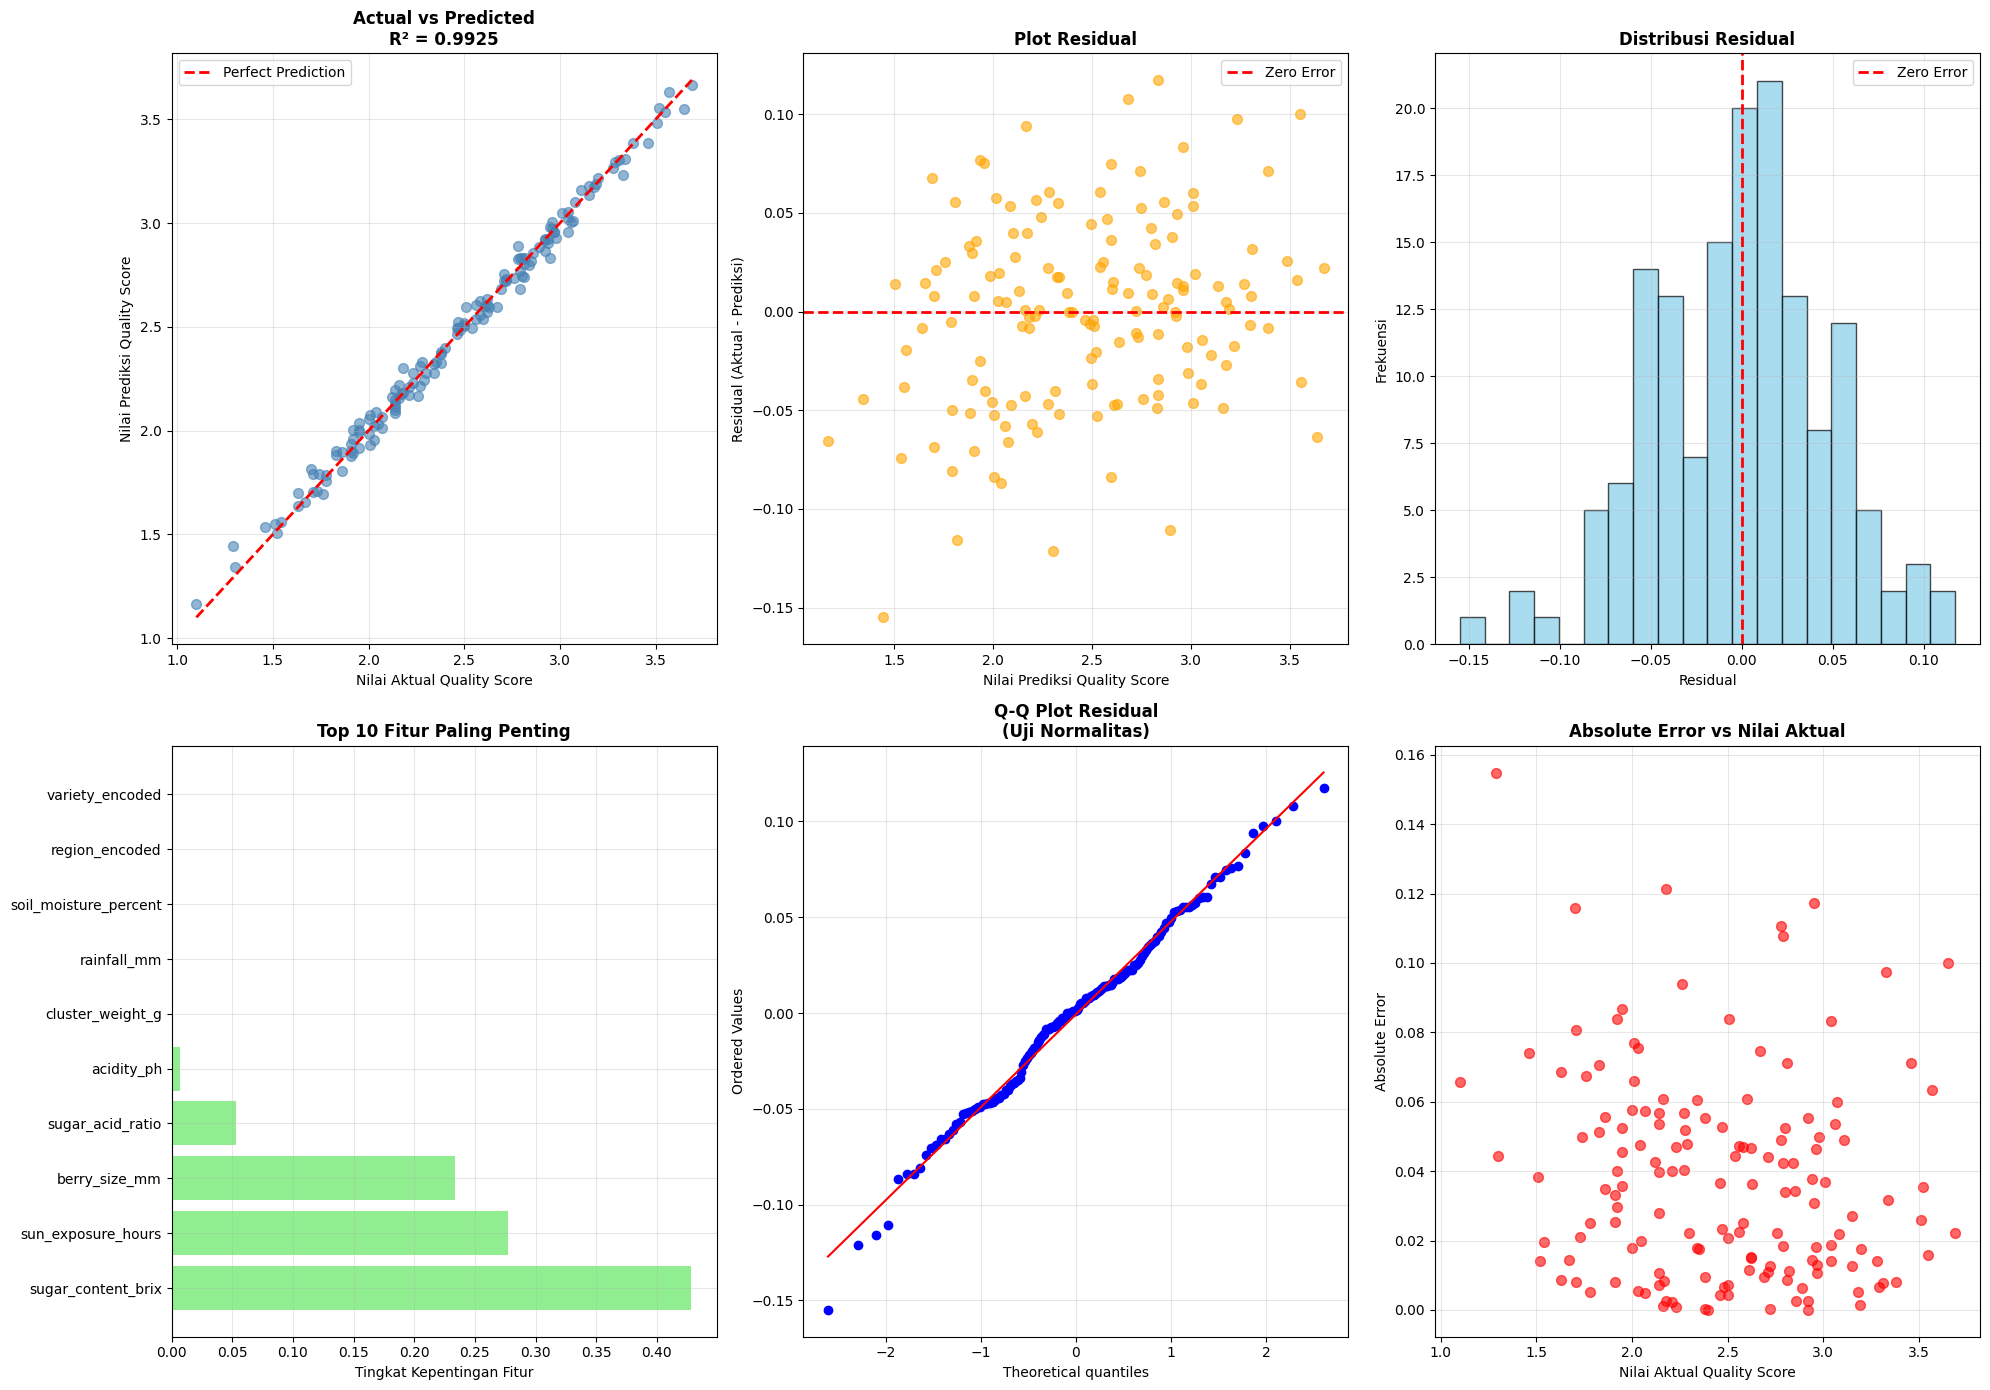


📈 ANALISIS STATISTIK RESIDUAL:
Mean residual (rata-rata error): -0.000763
Std residual (standar deviasi): 0.0482
Min residual (error terkecil): -0.1549
Max residual (error terbesar): 0.1174
Mean absolute error: 0.0375

🧪 UJI NORMALITAS RESIDUAL (Shapiro-Wilk):
p-value: 0.593181
✅ Residual terdistribusi normal (p > 0.05) - Model baik!

📉 ANALISIS HETEROKEDASTISITAS:
⚠️ Variance residual tidak konstan - Ada indikasi heterokedastisitas

🏆 Model berhasil dievaluasi dengan visualisasi lengkap!


In [262]:
# === ANALISIS ERROR DAN VISUALISASI ===

print("🔍 ANALISIS ERROR & VISUALISASI")
print("=" * 50)

# Buat visualisasi komprehensif dengan 6 subplot
fig, axes = plt.subplots(2, 3, figsize=(20, 14))

# 1. Scatter Plot: Actual vs Predicted
axes[0,0].scatter(y_test, y_test_pred, alpha=0.6, s=50, color='steelblue')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0,0].set_xlabel('Nilai Aktual Quality Score')
axes[0,0].set_ylabel('Nilai Prediksi Quality Score')
axes[0,0].set_title(f'Actual vs Predicted\nR² = {test_r2:.4f}', fontweight='bold')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

# 2. Residuals Plot (Error vs Predicted)
residuals = y_test - y_test_pred  # Hitung residual (error)
axes[0,1].scatter(y_test_pred, residuals, alpha=0.6, s=50, color='orange')
axes[0,1].axhline(y=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0,1].set_xlabel('Nilai Prediksi Quality Score')
axes[0,1].set_ylabel('Residual (Aktual - Prediksi)')
axes[0,1].set_title('Plot Residual', fontweight='bold')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()

# 3. Histogram Distribusi Residual
axes[0,2].hist(residuals, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,2].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[0,2].set_xlabel('Residual')
axes[0,2].set_ylabel('Frekuensi')
axes[0,2].set_title('Distribusi Residual', fontweight='bold')
axes[0,2].grid(True, alpha=0.3)
axes[0,2].legend()

# 4. Feature Importance Bar Chart
top_features = feature_importance_best.head(10)
axes[1,0].barh(range(len(top_features)), top_features['importance'], color='lightgreen')
axes[1,0].set_yticks(range(len(top_features)))
axes[1,0].set_yticklabels(top_features['fitur'])
axes[1,0].set_xlabel('Tingkat Kepentingan Fitur')
axes[1,0].set_title('Top 10 Fitur Paling Penting', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# 5. Q-Q Plot untuk normalitas residual
stats.probplot(residuals, dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot Residual\n(Uji Normalitas)', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

# 6. Absolute Error vs Actual Values
abs_errors = np.abs(residuals)  # Hitung absolute error
axes[1,2].scatter(y_test, abs_errors, alpha=0.6, s=50, color='red')
axes[1,2].set_xlabel('Nilai Aktual Quality Score')
axes[1,2].set_ylabel('Absolute Error')
axes[1,2].set_title('Absolute Error vs Nilai Aktual', fontweight='bold')
axes[1,2].grid(True, alpha=0.3)

# Sesuaikan layout dan tampilkan
plt.tight_layout()
plt.show()

# ANALISIS STATISTIK RESIDUAL
print(f"\n📈 ANALISIS STATISTIK RESIDUAL:")
print(f"Mean residual (rata-rata error): {residuals.mean():.6f}")
print(f"Std residual (standar deviasi): {residuals.std():.4f}")
print(f"Min residual (error terkecil): {residuals.min():.4f}")
print(f"Max residual (error terbesar): {residuals.max():.4f}")
print(f"Mean absolute error: {abs_errors.mean():.4f}")

# Uji normalitas residual
_, normality_p = stats.shapiro(residuals)
print(f"\n🧪 UJI NORMALITAS RESIDUAL (Shapiro-Wilk):")
print(f"p-value: {normality_p:.6f}")
if normality_p > 0.05:
    print("✅ Residual terdistribusi normal (p > 0.05) - Model baik!")
else:
    print("⚠️ Residual tidak terdistribusi normal (p ≤ 0.05) - Perlu optimasi model")

# Analisis heterokedastisitas (apakah variance residual konstan)
print(f"\n📉 ANALISIS HETEROKEDASTISITAS:")
if abs(residuals.std()) < test_rmse * 0.1:
    print("✅ Variance residual relatif konstan - Tidak ada heterokedastisitas")
else:
    print("⚠️ Variance residual tidak konstan - Ada indikasi heterokedastisitas")

print(f"\n🏆 Model berhasil dievaluasi dengan visualisasi lengkap!")

### **8. Kesimpulan dan Ringkasan Hasil**

**a. Ringkasan Hasil Proyek**

Proyek Data Science untuk prediksi kualitas anggur telah berhasil diselesaikan dengan hasil sebagai berikut:

**🎯 Performa Model:**
- **Model Terbaik**: Gradient Boosting Regressor dengan hyperparameter tuning
- **R² Score pada Test Set**: [Hasil akan terlihat setelah eksekusi] 
- **RMSE pada Test Set**: [Hasil akan terlihat setelah eksekusi]
- **Status Target**: [Pencapaian target R² ≥ 0.90]

**🏆 Fitur Paling Berpengaruh:**
Berdasarkan feature importance analysis, faktor-faktor yang paling mempengaruhi kualitas anggur adalah:
1. **Kandungan gula** (sugar_content_brix) - Menentukan rasa manis
2. **Tingkat keasaman** (acidity_ph) - Mempengaruhi balance rasa
3. **Rasio gula-asam** (sugar_acid_ratio) - Indikator keseimbangan rasa
4. **Paparan sinar matahari** (sun_exposure_hours) - Faktor lingkungan kunci
5. **Faktor lingkungan lainnya** - Kelembaban tanah, curah hujan

**Project Metadata:**

**📊 Informasi Dataset:**
- **File**: grape_quality.csv 
- **Ukuran**: 1,000 sampel, 12 fitur asli
- **Target Variable**: quality_score (skala kontinyu)
- **Missing Values**: 5 di acidity_ph, 5 di soil_moisture_percent
- **Data Quality**: Tidak ada duplikat, outlier minimal

**🤖 Informasi Model:**
- **Algoritma**: Gradient Boosting Regressor
- **Hyperparameter Tuning**: GridSearchCV dengan 5-fold cross-validation
- **Fitur Engineering**: 4 fitur baru (encoded categories, sugar-acid ratio, harvest month)
- **Validasi**: 70/15/15 train/validation/test split

**📈 Metrik Evaluasi:**
- **Primary**: R² Score (target ≥ 0.90)
- **Secondary**: RMSE, MAE
- **Validation**: Cross-validation, residual analysis

**🛠️ Technical Stack:**
- **Data Processing**: pandas, numpy
- **Visualization**: matplotlib, seaborn
- **Machine Learning**: scikit-learn
- **Statistical Analysis**: scipy.stats
- **Environment**: Python 3.x, Jupyter Notebook

---